<a href="https://colab.research.google.com/github/gerritgr/pokemon_diffusion/blob/main/Practical_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submission:

Devikalyan Das- 7007352

# Pokemon Diffusion

Repository for the practical projecto the [*Deep Generative Diffusion Models*](https://mosi.uni-saarland.de/lectures/22_2_deep_diffusion/) Seminar at Saarland University.

## Rules ⚖️ 

### Formalities 📝 

* The goal is to implement an end-to-end diffusion model on the CelebFace dataset.
* You work alone or in groups of two.
* Plagiarism will get you expelled from the seminar and potentially exmatriculated. However, you can discuss solutions with your fellow students and take inspiration from open-source implementations (see references). 
* You can also copy&pase small code snippets if they are clearly indicated.
* We recommend Python + PyTorch for the implementation. If you want to use something else, please reach out to us. 
* Your code should run on Google Colab and normal desktop computers with minimal setup effort.
* We will invite each team to explain their code in an individual meeting. You (resp. both of you) should be able to explain the code in detail and justify design choices.
* Submit your results via e-mail to Gerrit.

### How to Pass 🎓

* To pass, you need to provide a (in a reasonable sense) technically correct implementation of a forward and backward process. You will not be judged on the visual quality of the generated images.
* In addition, you should generate animations (e.g., gifs) of the forward and backward process to illustrate what is going on during training and data generation (cf. *one_step_forward()* function).
* Comment your code extensively and assign proper names to your functions, variables, and classes. 
* Set seeds to make your code deterministic and save the final weights. 
* You should also visually verify that the forward process ends in a standard normal distribution by providing a reasonable visualization (analogously to *color_distribution_original_images.png*).
* We recommend following the denoising diffusion paradigm. When you want to use score-based or SDE methods, you can do so as well. 
* If you make very unconventional design choices, you will need to be able to justify them. 
* Do you see any problems with your implementations or room to improve? Explain in a short paragraph (can be part of the notebook). 
* You can use this notebook or use your code from scratch. 

### Notes on the Reference Implementation 💻 

* You will probably need to activate the GPU of Colab and use batched images when you want to be able to generate nice images (for passing, this is not necessary, though)
* We use a simple linear schedular and batch size of 256. 
* We predict the original image and not the noise. 
* We use a Unet, inspired by _The Annotated Diffusion Model_.
* We run at least for 1000 epochs.
* The visual quality strongly depends on the complexity of the Unet. Do not worry if your generated images look more like blobs than actual Pokomen. For passing, a minimal Unet or Autoencoder is enough. 
* Of course, you can always test other (larger) datasets to play around with.

### Bonus 🏆

For a bonus (0.3 on your final grade), you can extend the implementation in any creative way. Possibilities include:
* Smart data augmentation, extending the data set, or pre-training
* Conditioning (e.g. on the Pokemon *type*)
* Testing different network architectures, schedulers, or time-embeddings and reporting the findings.
* Using a latent diffusion approach instead of diffusion in the RGB/image space.

If you have any other idea you think is worth investigating: try it out!


### References 📚
Preliminaries 💡 
* [10 tricks for a better Google Colab experience](https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82)
* [Youtube: Deep Learning With PyTorch - Full Course (in case you need some PyTorch refreshments)](https://www.youtube.com/watch?v=c36lUUr864M&ab_channel=PatrickLoeber)
* [UvA PyTorch Tutorial](https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html)

Diffusion 🧨
* [Tiny Diffusion Repo by tanelp (minimal example of a 2D diffusion)](https://github.com/tanelp/tiny-diffusion)
* [Youtube: Diffusion models from scratch in PyTorch](https://www.youtube.com/watch?v=a4Yfz2FxXiY&t=644s)
* [Youtube: Diffusion Models | PyTorch Implementation](https://www.youtube.com/watch?v=TBCRlnwJtZU&ab_channel=Outlier)
* [The Annotated Diffusion Model](https://huggingface.co/blog/annotated-diffusion)
* [U-Net: A PyTorch Implementation in 60 lines of code](https://amaarora.github.io/2020/09/13/unet.html)

Pokemon 🐲
* [Pokemon Images Dataset on Kaggle](https://www.kaggle.com/datasets/kvpratama/pokemon-images-dataset)
* [PokeGAN: Generating Fake Pokemon with a Generative Adversarial Network](https://blog.jovian.com/pokegan-generating-fake-pokemon-with-a-generative-adversarial-network-f540db81548d)
* [pokemon-ga by Zhenye Na (contains the dataset we are using)](https://github.com/Zhenye-Na/pokemon-gan)


## Files 📁
* `color_distribution_original_images.png`: RGB value disribution of the trainings data
* `dataset_summary.png`: Some (augmented) images from the trainings data
* `forward_animate.gif`: Animation of an (incorrect) forward process. 
* `forward_grid.png`: Imagegrid of an (incorrect) forward process. 
* `reverse_process_reference_epoch_X.gif`: Examples of the reverse process of the reference implementation after X epochs
* `color_distribution_normal_reference.png`: RGB value disribution of the trainings _after_ the forward process

# Setup

Also installs some dependencies such as FID metrics for evaluating the performance. Please restart after installing the dependencies

In [ ]:
!pip install torchmetrics
!pip install torch-fidelity

### 1. Downloading the Data

Download the data and the class information(pokemon type), extracts it and stores it accordingly for accessing them.

In [ ]:
import gdown
# download data
url1 = 'https://drive.google.com/uc?id=12HvQ3tw2FHszYHBksPGB2jmR7bVGkOoE'
output1 = 'pokemon_data.zip'
# download class information
url2 = 'https://drive.google.com/uc?id=1-_u333FgUf_mry30izKwAyNVCugfRkiR'
output2 = 'pokemon.csv'

gdown.download(url1, output1, quiet=False)
gdown.download(url2, output2, quiet=False)

#import zipfile module
from zipfile import ZipFile

with ZipFile('./pokemon_data.zip', 'r') as f:

    #extract in current directory
    f.extractall()

Downloading...
From: https://drive.google.com/uc?id=12HvQ3tw2FHszYHBksPGB2jmR7bVGkOoE
To: /content/pokemon_data.zip
100%|██████████| 51.8M/51.8M [00:01<00:00, 28.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-_u333FgUf_mry30izKwAyNVCugfRkiR
To: /content/pokemon.csv
100%|██████████| 21.6k/21.6k [00:00<00:00, 36.1MB/s]


### 2. Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100 # Set this to 300 to get better image quality
from PIL import Image # We use PIL to load images
import seaborn as sns
import imageio # to generate .gifs
from sklearn import preprocessing as prs
import sys
# always good to have
import glob, random, os
import numpy as np
from pathlib import Path
from tqdm import tqdm
import pandas as pd
# the typical pytorch imports
import torch
import torchvision
from torchvision import transforms 
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch import nn
from torch.nn import Conv2d
from torch.optim import Adam
from torch.nn import init

from torchvision.utils import save_image
import gdown

### 3. Hyperparameters

These are just random hyperparameters, play around with them. 

The '*TRAIN*' parameter allows if you want to train or evaluate. \
The '*experiment_name*' tells what expermiment to conduct. The default one is 'pred_1' which indicates the default experiment to be carried out with diffusion step - 300. \
For other experiment in **Bonus** section please refer the given parameters in that section and change these parameters accordingly.

In [ ]:
TRAIN = False   # change this to True if you want to train the models 
IMG_SIZE = 64   # We assume images are square with IMG_SIZE*IMG_SIZE pixels, 16x16 works, too.
EPOCHS = 4000
BATCH_SIZE = 64
BETA_START = 0.0001  # The Variance scheduler constant
BETA_END = 0.05    # The Variance scheduler constant
experiment_name = 'pred_1'
# On Colab, go to Runtime -> Change runtime type to switch to GPU 
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
CHANNELS = 3  # We use RGB images
# Experiments Type
TIMESTEPS = 300  # we will try for time steps 100 / 300
TIME_DIV = int(TIMESTEPS//10) # This corresponds to the time steps after which we save the image
LOSS_TYPE = "l2" 
NOISE_SCHEDULER_TYPE = "linear" # we will try for linear/ quadratic/ sigmoid
TIME_EMBEDDING_TYPE = "sinusoidal" # we will try for Sinusioidal /  Linear
NUM_GROUPS = 8   # for group normalization groups. Check for 8 / 32
LEARNING_RATE=1e-4
NUM_RES_BLOCKS = 2 
DROPOUT = 0.1    
TIME_DIMENSION= 128 # for time_embed type: linear =1 , sinusoidal=128 
CLASS_COND = None  # For using pokemon type conditioning use 'yes' or else use None
DEVICE

device(type='cuda')

### 4. Folder Creation

Create folders for saving the weights and ouputs during training and evaluation

In [ ]:
# Create the various faolders to save the results

# save intermediate results during training
results_folder = Path("./intermediate_results/{}".format(experiment_name))
results_folder.mkdir(parents=True,exist_ok = True)

# save the trained weights based on the experiment. 
# Basically we will be saving two weights: best and the last
outdir = Path("./exps/{}".format(experiment_name))
outdir.mkdir(parents=True,exist_ok=True)

#  Save the generated results during inference. Also save the backward diffusion gif file here
save_img_dir = Path("./saved_imgs/{}".format(experiment_name))
save_img_dir.mkdir(parents=True,exist_ok=True)

### 4.1 Downloads saved weights for evaluation if not training

In [ ]:
if not TRAIN:
    if experiment_name == 'pred_0':
        url = 'https://drive.google.com/uc?id=18-0KszTg2yzsgPbBnNccLo3W0SzLfvhE'
    elif experiment_name == 'pred_1':
        url = 'https://drive.google.com/uc?id=1Y4v4jzHEsEIvne_c-4L6jkLSjL7QY020'
    elif experiment_name == 'pred_2':
        url = 'https://drive.google.com/uc?id=1cc5LrIH4XSpnWQVPScKqddbVV0tUQXWr'
    elif experiment_name == 'pred_3':
        url = 'https://drive.google.com/uc?id=11gqJioAcGyBeXgP9lLuLRgGFlA_ISe7f'
    elif experiment_name == 'pred_4':
        url = 'https://drive.google.com/uc?id=1ZcFM6ue49PzvjdCQmZdPn6kInS4-OkFp'
   
    output = os.path.join(outdir,'model_{}.pth'.format(experiment_name))

    gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Y4v4jzHEsEIvne_c-4L6jkLSjL7QY020
To: /content/exps/pred_1/model_pred_1.pth
100%|██████████| 223M/223M [00:03<00:00, 63.8MB/s]


### 4.2 Define seed for reproducibility of the results

In [ ]:
np.random.seed(42)
torch.manual_seed(42)
torch.random.manual_seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
os.environ['PYTHONHASHSEED'] = '42'
torch.backends.cudnn.deterministic = True

In [ ]:
from torchmetrics.image.fid import FrechetInceptionDistance as FID

Downloads weights for evaluation

### 5. Utils

We start by defining some friendly little helpers. 

In [ ]:
def image_to_tensor(image):
    """Convert a PIL image to a PyTorch tensor.

    Args:
        image (PIL.Image): The image to be converted.

    Returns:
        torch.Tensor: The converted PyTorch tensor.
    """
    
    # Define the image transformation pipeline
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.Lambda(lambda t: (t - 0.5) * 2.)
    ])

    # Apply the transformation pipeline to the image
    return transform(image)


def tensor_to_img(tensor):
    """Convert a PyTorch tensor to a PIL image.

    Args:
        tensor (torch.Tensor): The PyTorch tensor to be converted.

    Returns:
        PIL.Image: The converted PIL image.
    """
    # print(tensor)
    # tensor,lbl = tensor_tuple
    # Define the tensor transformation pipeline
    transform = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1.) / 2.),
        transforms.Lambda(lambda t: torch.clamp(t, min=0., max=1.)),
        transforms.ToPILImage()
    ])

    # Apply the transformation pipeline to the tensor
    return transform(tensor)#,lbl


def show_from_image_list(img_list, img_num=10, filename=None):
    """Show a grid of images from a list of images. Sample uniformly spaced images.
        (Alternativly, use make_grid from torchvision.utils)

    Args:
        img_list (list): The list of images to be displayed. Can be PIL or image tensors.
        img_num (int, optional): The number of images to be displayed. Default is 10.
        filename (str, optional): The name of the file to save the plot to. If None, the plot will not be saved. Default is None.
    """
    # Ensure that the number of images to be displayed is less than or equal to the number of images in the list
    img_num = min(len(img_list), img_num)

    # Get the index of the images to be displayed
    img_num_index = np.linspace(0, len(img_list)-1.0, num=img_num).astype(int)

    # Clear the current figure (if there is any)
    plt.clf()

    # Create a figure with 1 row and `img_num` columns
    fig, ax = plt.subplots(1, img_num, figsize=(15, 15), gridspec_kw={'width_ratios': [1] * img_num})

    # Iterate through the images to be displayed
    for i, idx in enumerate(img_num_index):
        img_i = img_list[idx]

        # Check if the image is a PyTorch tensor and convert it to PIL
        if isinstance(img_i, torch.Tensor):
            img_i = tensor_to_img(img_i)

        # Display the image
        ax[i].imshow(img_i)
        ax[i].axis('off')

    # Save the plot to a file if the filename is provided
    if filename is not None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


### 6. Defining the Dataset and Loader

First, we need to create a `Dataset` and a `DataLoader` containing the images (currently in the image folder). This is PyTorch best practice.

The `Dataset` provides access to individual data samples/images  (also providing on-the-fly image augmentation). The `Dataloader` enables efficient loading of the data in mini-batches (also providing randomization).

We build our own `Datset` class that loads the images from disk and stores them in PyTorch tensors of shape $(3, \text{IMG_SIZE}, \text{IMG_SIZE})$ with values between $-1$ and $1$.


First of all we checked the dataset and found that many samples (pokemons) are repeated. So, we manually removed the extra pokemon and added new pokemons from [Pokedex](https://www.pokemon.com/us/pokedex). For data augementation we found that random Horizontal flip makes more sense because other augmentations change the object information in the image while random horizontal flip does not. \
**Bonus**\
We also assigned the class each pokemon belonged to, referring to this website. This will be helpful for the class conditional generation using classifier-free guidance approach which we have performed in the Bonus section.

In [ ]:
from torch.utils.data import Dataset, DataLoader, IterableDataset, TensorDataset


class ImageDataset(Dataset):
    """A dataset for images that supports on-the-fly transformations (i.e., augmentations).

      Args:
          imgpaths (str, optional): The path pattern for the images. Default is "pokemon/*png".
      """

    def __init__(self, img_paths="./pokemon/*png",label_path ='./pokemon.csv'):

        # You can/should play around with these. Which of the augmantation make sense? 
        self.on_the_fly_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
#         transforms.RandomApply(torch.nn.ModuleList([transforms.RandomCrop(int(IMG_SIZE*0.8)),]), p=0.1),
#         transforms.RandomAutocontrast(p=0.1),
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.Lambda(lambda t: torch.clamp(t, min=-1., max=1.)),
        ])

        self.img_list = list()
        # Read the labels from csv        
        # Complete label list. First get string labels converted to integer values
        df1 = pd.read_csv(label_path, delimiter=',')
        # df1.dataframeName = 'pokemon.csv'
        nRow, nCol = df1.shape
        print(f'There are {nRow} rows and {nCol} columns')
        self.label_string_list = list(df1['type'])
        le = prs.LabelEncoder()
        le.fit(self.label_string_list)
        self.classes = list(le.classes_)
        print(f'There are {len(self.classes)} classes')
        self.label_list = list(le.transform(self.label_string_list))

        for img_path in glob.glob(img_paths):
          # Turn the transparent part in the image to white following 
          # https://stackoverflow.com/questions/50898034/how-replace-transparent-with-a-color-in-pillow
            image = Image.open(img_path)
            rgba_image = Image.new("RGBA", image.size, "WHITE")
            rgba_image.paste(image, (0, 0), image)   
            rgb_image = rgba_image.convert('RGB')

              # Convert the PIL image to a tensor, where each value is in [-1,1].
            img_as_tensor = image_to_tensor(rgb_image)
            self.img_list.append(img_as_tensor)

    def __getitem__(self, index):
        """Get an image tensor from the dataset with on-the-fly transformation.

        Args:
            index (int): The index of the image tensor in the dataset.

        Returns:
            torch.Tensor: The image tensor with on-the-fly transformation.
        """
        img = self.img_list[index]
        lbls = float(self.label_list[index])
        # Normalize the labels
        lbls_norm = lbls #self.normalize_lbls(lbls)
        
#         img = tensor_to_img(img)
        img = self.on_the_fly_transform(img)
#         img = image_to_tensor(img)
        
        return img,lbls_norm
    def normalize_lbls(self,labels):
        return labels/len(self.classes)

    def denormalize_lbls(self,labels):
        lbls = labels*(len(self.classes))
        # Need to see what I need whetehr labels or just norm values
        return lbls

    def get_pil_image(self, index, with_random_augmentation=True,label=False):
        """Get a PIL image from the dataset with or without on-the-fly transformation.

        Args:
            index (int): The index of the PIL image in the dataset.
            with_random_augmentation (bool, optional): Whether to apply on-the-fly transformation. Default is True.

        Returns:
            PIL.Image: The PIL image with or without on-the-fly transformation.
        """
        if with_random_augmentation:
            return tensor_to_img(self.__getitem__(index)[0])
        return tensor_to_img(self.img_list[index])

    def __len__(self):
        return len(self.img_list)


dataset = ImageDataset(img_paths="./pokemon/*png",label_path ='./pokemon.csv')

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

There are 1106 rows and 3 columns
There are 19 classes


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
# Note hat just grabbing an image from the dataset adds a random image augmentation.
# Generally speaking, this will be False. Try a few times.
torch.all(dataset[0][0] == dataset[0][0])  # torch.all test if all entries are True

tensor(False)

### 7. Inspecting the Dataset

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


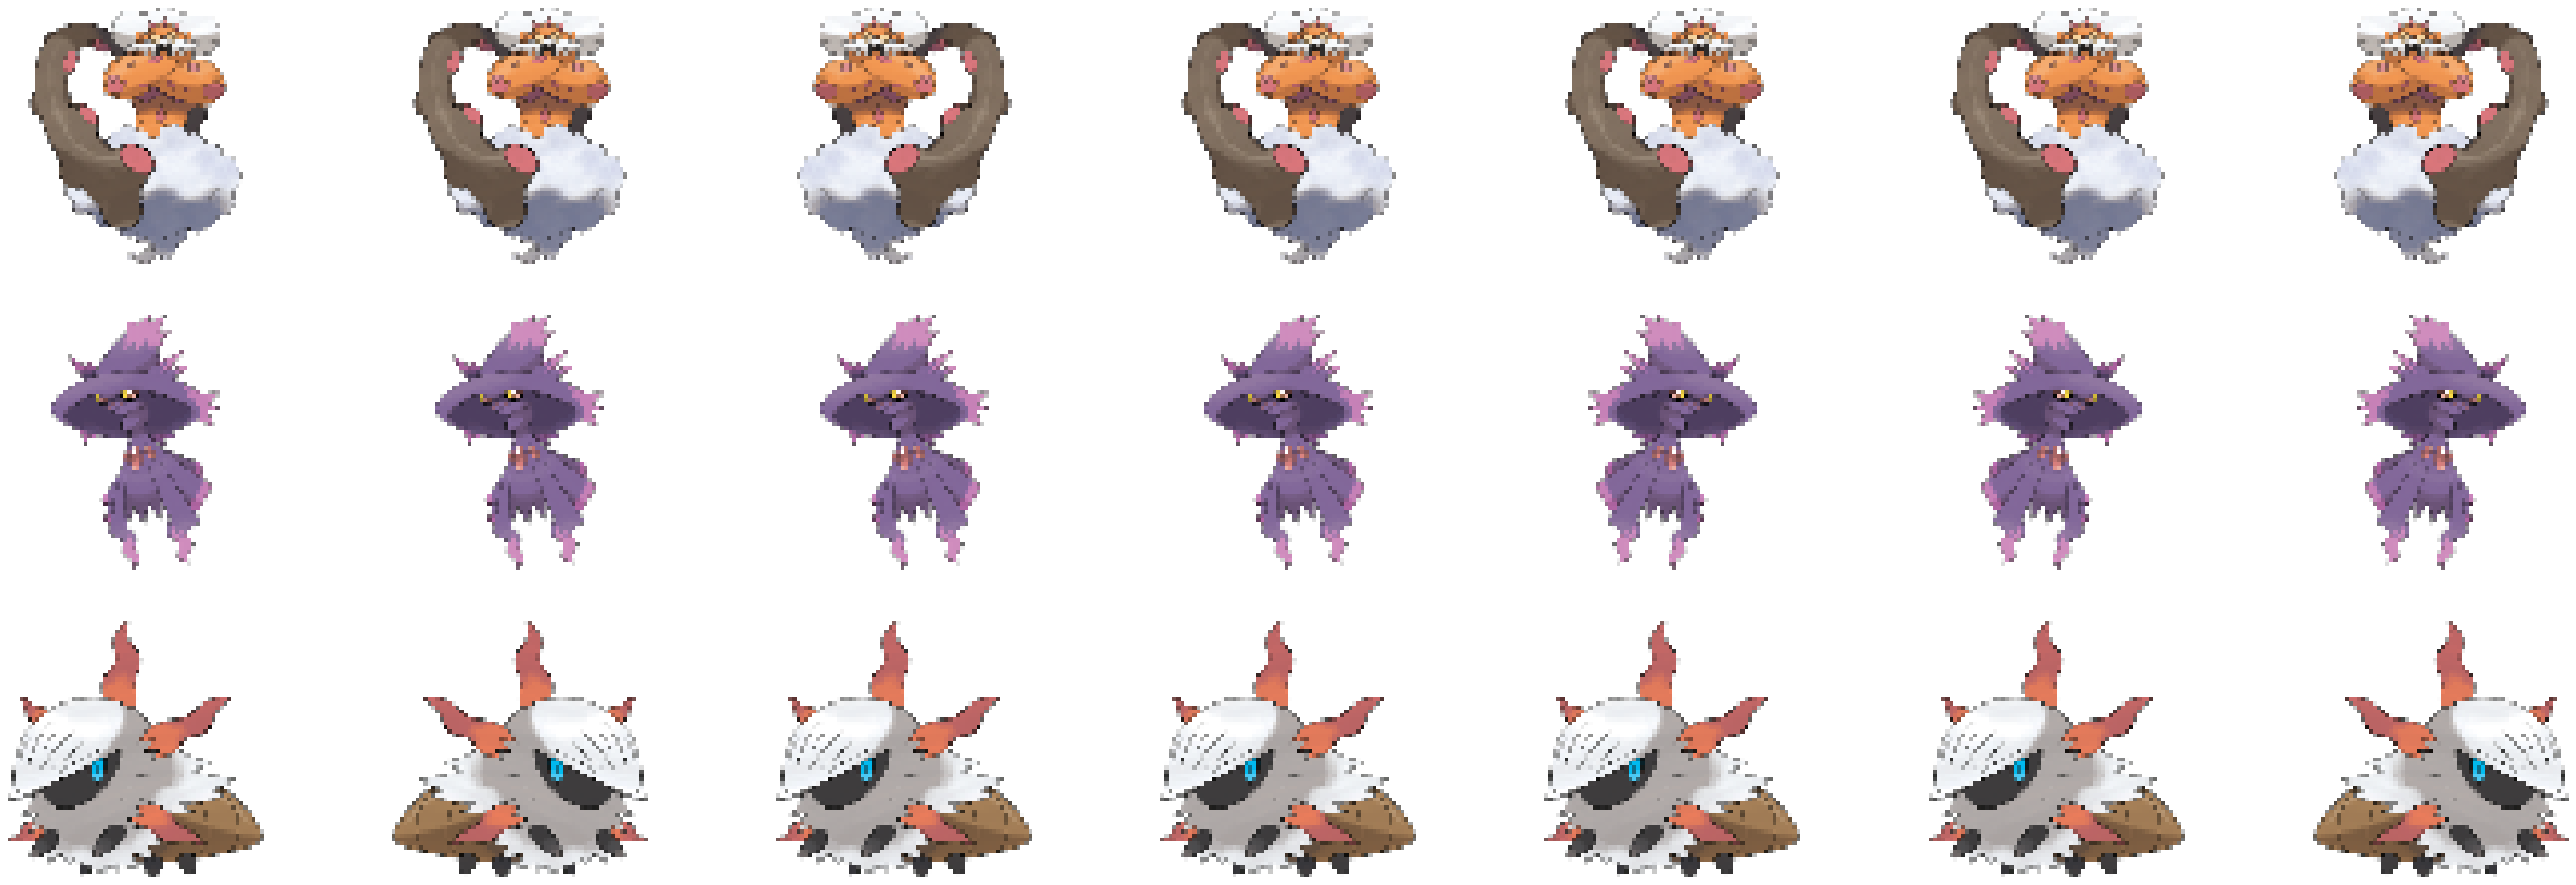

In [ ]:
# Visualize the data

# Show seven versions of the first three Pokemons. 
images_per_row = 7
fig, axes = plt.subplots(3, images_per_row, figsize=(45, 15))

# Plotting each image in a subplot
for i, ax in enumerate(axes.flat):
    # The leftmost Pokemon is without augmentation (with_random_augmentation is False).
    with_random_augmentation = False if i % images_per_row == 0 else True
    # print(i//images_per_row)
    # print(with_random_augmentation)
    ax.imshow(dataset.get_pil_image(i//images_per_row, with_random_augmentation=with_random_augmentation))
    ax.axis('off')

plt.savefig(os.path.join(save_img_dir,'dataset_summary.png'), bbox_inches='tight')
plt.show()


Next, we visualize the frequency of each RGB value in the image dataset (before augmentation). After the forward process, this should look like three standard normal distributions.

In [ ]:
# Create giant tensor with all images.
img_num = len(dataset.img_list)
tensor_with_all_images = torch.zeros((img_num, CHANNELS, IMG_SIZE, IMG_SIZE))
for i, img in enumerate(dataset.img_list):
    tensor_with_all_images[i,:,:,:] = img

# Save the pixel values of all images in 1D tensor for each channel. 
pixels_red = tensor_with_all_images[:,0,:,:].flatten().numpy()
pixels_green = tensor_with_all_images[:,1,:,:].flatten().numpy()
pixels_blue = tensor_with_all_images[:,2,:,:].flatten().numpy()

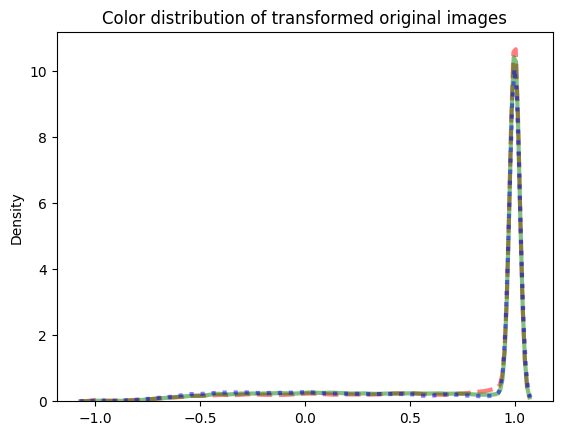

In [ ]:
ax = sns.kdeplot(pixels_red, color="red", alpha=0.5, ls="--", lw=3)
sns.kdeplot(pixels_green, color="green", ax=ax, alpha=0.5, lw=3)
sns.kdeplot(pixels_blue, color="blue", ax=ax, alpha=0.5, ls=":", lw=3)
plt.title("Color distribution of transformed original images")
plt.savefig(os.path.join(save_img_dir,'color_distribution_original_images.png'), dpi=300, bbox_inches='tight')

### 8. Visualizing the Forward Process

#### 8.1 Various schedulers

We defined the various variance schedulers for carrying out the perturbation process.

In [ ]:
# Various schedulers

def linear_beta_schedule(beta_start, beta_end, timesteps):
    return torch.linspace(beta_start, beta_end, timesteps)

def quadratic_beta_schedule(beta_start, beta_end,timesteps):
    return torch.linspace(beta_start**0.5, beta_end**0.5, timesteps) ** 2

def sigmoid_beta_schedule(beta_start, beta_end, timesteps):
    betas = torch.linspace(-6, 6, timesteps)
    return torch.sigmoid(betas) * (beta_end - beta_start) + beta_start

def scheduler_type(beta_start, beta_end, timesteps,type_sc='linear'):
    if type_sc == "linear":
        return linear_beta_schedule(beta_start, beta_end, timesteps)
    elif type_sc == "quadratic":
        return quadratic_beta_schedule(beta_start, beta_end, timesteps)
    elif type_sc == "sigmoid":
        return sigmoid_beta_schedule(beta_start, beta_end, timesteps)
    else:
        raise ValueError("unknown scheduler type")


#### 8.2 Visualizing the forward Process

Here we carried out the forward diffusion process by first calculating the noise parameters mean and the standard deviation using.
$$
q(x_{1:T}\vert x_{0})
:= \prod_{t=1}^{T}q(x_{t}\vert x_{t-1})
:=\prod_{t=1}^{T}\mathcal{N}(x_{t};\sqrt{1-\beta_{t}} x_{t-1},\ \beta_{t}\bf I) \tag{1}
$$
Where, $q(x_{0:T})$ is known as the **forward distribution** and $q(x_{t}\vert x_{t-1}$ is referred as **forward diffusion kernel**. This needs to simulate the Markov chain to the time step for which we want to sample.

But we used the reparameterised trick where, given the original image, we can now sample at any arbitrary timestep without simulating the entire Markov chain till that step like the above equaion. So we followed:
$$
q(x_{t}\vert x_{0}) = \mathcal{N}(x_{t};\sqrt{\bar{\alpha_{t}}} x_{0},\ (1 - \bar{\alpha_{t}}) \ \bf{I}) \tag {2}
$$

<Figure size 640x480 with 0 Axes>

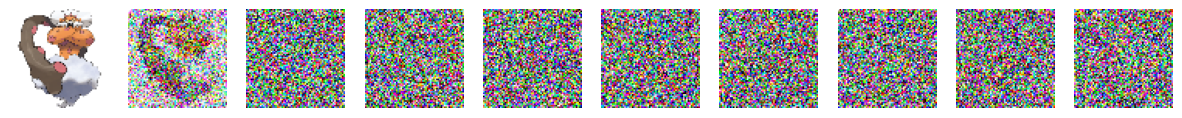

In [ ]:
def extract_single(a, t, x_shape):
    t = torch.tensor(t)
    batch_size = t.shape
    out = a.gather(-1, t)
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(DEVICE)

def one_step_forward(img, t):
    
    beta_start = BETA_START
    beta_end = BETA_END
    # beta = torch.linspace(beta_start, beta_end, steps = TIMESTEPS,dtype = torch.float)
    beta = scheduler_type(beta_start, beta_end, TIMESTEPS,type_sc = NOISE_SCHEDULER_TYPE)
    # Using alpha and alpha bar after reparametrization
    alpha = 1.0 - beta
    alpha_bar = torch.cumprod(alpha, axis=0)
    sqrt_alphas_bar = torch.sqrt(alpha_bar)
    sqrt_one_minus_alphas_bar = torch.sqrt(1. - alpha_bar)
 
    # 2. Calculate mean and variance
    sigma = extract_single(sqrt_one_minus_alphas_bar, t, img.shape)
    mu = extract_single(sqrt_alphas_bar, t, img.shape)  
    return img.to(DEVICE) * mu.to(DEVICE)  + sigma.to(DEVICE) * torch.randn_like(img, device=DEVICE)

def create_forward_animation(dataset):
    img = dataset.img_list[0].to(DEVICE)
    img_list = list()
    # if TIMESTEPS is too large, you can use a subset
    img_list.append(tensor_to_img(img))

    for t in range(TIMESTEPS):
        img = one_step_forward(img, t=t)
        img_list.append(tensor_to_img(img)) 
    return img_list
  
img_list = create_forward_animation(dataset)

# the .gif file can get pretty large
imageio.mimsave(os.path.join(save_img_dir,"forward_animate.gif"), img_list, fps=10) 
# we can also show the images inline
show_from_image_list(img_list, filename = os.path.join(save_img_dir,'forward_grid.png'))


The forward process animation:

<table>
  <tr>
    <td>Forward Animated Result:    x_0 --> x_T </td>
  </tr>
  <td><img src=https://drive.google.com/uc?id=1FJQ3xMUxXlHkV9G3fTd2lVOCbjDJePen width=300 height=300></td>

  </tr>
 </table>


We verified forward process ends in a standard normal distribution with the visualization of color distribution of the final timestep image.


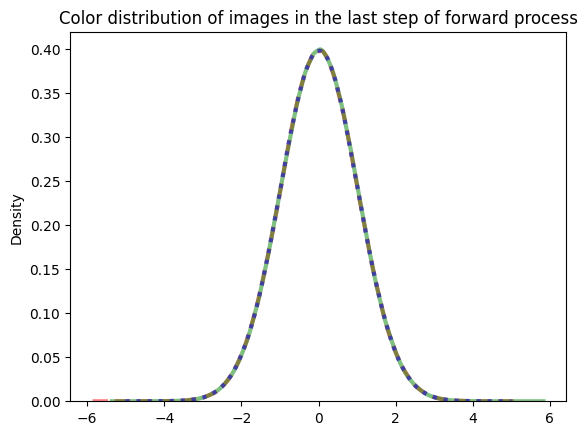

In [ ]:
forward_img_list = list()
for n,img in enumerate(dataset.img_list):

    img1 = one_step_forward(img.to(DEVICE), t=TIMESTEPS-1)
    forward_img_list.append(img1)

# Create giant tensor with all images.
img_num = len(forward_img_list)
tensor_with_all_images = torch.zeros((img_num, CHANNELS, IMG_SIZE, IMG_SIZE))
for i, img in enumerate(forward_img_list):
    tensor_with_all_images[i,:,:,:] = img

# Save the pixel values of all images in 1D tensor for each channel. 
pixels_red_f = tensor_with_all_images[:,0,:,:].flatten().numpy()
pixels_green_f = tensor_with_all_images[:,1,:,:].flatten().numpy()
pixels_blue_f = tensor_with_all_images[:,2,:,:].flatten().numpy()

ax = sns.kdeplot(pixels_red_f, color="red", alpha=0.5, ls="--", lw=3)
sns.kdeplot(pixels_green_f, color="green", ax=ax, alpha=0.5, lw=3)
sns.kdeplot(pixels_blue_f, color="blue", ax=ax, alpha=0.5, ls=":", lw=3)
plt.title("Color distribution of images in the last step of forward process")
plt.savefig(os.path.join(save_img_dir,'color_distribution_noisy_images.png'), dpi=100, bbox_inches='tight')

<!-- <table>
  <tr>
    <td>Color Distribution of the last image of our Forward Process:  x_T </td>
  </tr>
  <td><img src=https://drive.google.com/uc?id=1yaPqrbZ5nssjHbKzo-iTy3CJEvd9Tbps width=300 height=300></td>

  </tr>
 </table> -->
 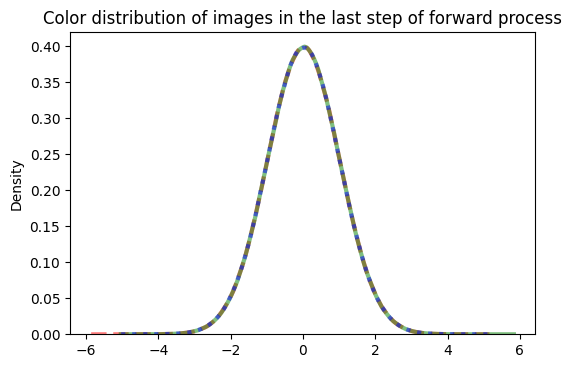

### 9. Model

We have used a U-Net architecture as our DIffusion Model in order to predict the noise. We have relied heavily on [annotated diffusion model](https://huggingface.co/blog/annotated-diffusion) for designing this U-Net. The goal of this uncondtional U-Net is to predict the noise:

$$
  \epsilon_{\theta}(x_{t},t)
$$
where, 
$$x_{t} = \sqrt{\bar{\alpha_{t}}} x_{0}+\ \sqrt{(1 - \bar{\alpha_{t}})}\epsilon $$
Here, $x_{t}$ is the initial (real, uncorrupted) image, and we see the direct noise level $t$ sample given by the fixed forward process. $ϵ$ is the pure noise sampled at time step $t$ and the  $\epsilon_{\theta}$ is our U-Net.

In the ***Bonus*** part, for conditional generation based on class conditioning, we used:
$$
  \epsilon_{\theta}(x_{t},t,c)
$$
where, $c$ is the class (pokemon type) information

#### 9.1 Positional Encoding
Position encoding for the time input. Considered only Sinusoidal and Linear Embedding.

Source-> https://github.com/tanelp/tiny-diffusion/blob/master/positional_embeddings.py

In [ ]:
class SinusoidalEmbedding(nn.Module):
    def __init__(self, size: int, scale: float = 1.0):
        super().__init__()
        self.size = size
        self.scale = scale

    def forward(self, x: torch.Tensor):
        device = x.device
        x = x * self.scale
        half_size = self.size // 2
        emb = torch.log(torch.Tensor([10000.0])) / (half_size - 1)
        emb = torch.exp(-emb.to(device) * torch.arange(half_size,device=device))
        emb = x.unsqueeze(-1) * emb.unsqueeze(0)
        emb = torch.cat((torch.sin(emb), torch.cos(emb)), dim=-1)
        return emb

    def __len__(self):
        return self.size


class LinearEmbedding(nn.Module):
    def __init__(self, size: int, scale: float = 1.0):
        super().__init__()
        self.size = size
        self.scale = scale

    def forward(self, x: torch.Tensor):
        x = x / self.size * self.scale
        return x.unsqueeze(-1)

    def __len__(self):
        return 1

class PositionalEmbedding(nn.Module):
    def __init__(self, size: int, type: str, **kwargs):
        super().__init__()

        if type == "sinusoidal":
            self.layer = SinusoidalEmbedding(size, **kwargs)
        elif type == "linear":
            self.layer = LinearEmbedding(size, **kwargs)
        else:
            raise ValueError(f"Unknown positional embedding type: {type}")

    def forward(self, x: torch.Tensor):
        return self.layer(x)


#### 9.2 Layer Normalization type
Select type of normalization. In paper they have used group normalization in convolutional and attention layers

In [ ]:
def norm_type(norm, num_channels, num_groups):
    if norm == "in":
        return nn.InstanceNorm2d(num_channels, affine=True)
    elif norm == "bn":
        return nn.BatchNorm2d(num_channels)
    elif norm == "gn":
        return nn.GroupNorm(num_groups, num_channels)
    elif norm is None:
        return nn.Identity()
    else:
        raise ValueError("unknown normalization type")

#### 9.3 Self-Attention network
Self Attention is used as per DDPM paper, with various normalization

In [ ]:
class AttentionBlock(nn.Module):
    """Applies QKV self-attention with a residual connection.
    
    Input:
        x: tensor of shape (N, in_channels, H, W)
        norm (string or None): which normalization to use (instance, group, batch, or none). Default: "gn"
        num_groups (int): number of groups used in group normalization. Default: 32
    Output:
        tensor of shape (N, in_channels, H, W)
    Args:
        in_channels (int): number of input channels
    """
    def __init__(self, in_channels, norm="gn", num_groups=32):
        super().__init__()
        
        self.in_channels = in_channels
        self.norm = norm_type(norm, in_channels, num_groups)
        self.to_qkv = nn.Conv2d(in_channels, in_channels * 3, 1)
        self.to_out = nn.Conv2d(in_channels, in_channels, 1)

    def forward(self, x):
        b, c, h, w = x.shape
        q, k, v = torch.split(self.to_qkv(self.norm(x)), self.in_channels, dim=1)

        q = q.permute(0, 2, 3, 1).view(b, h * w, c)
        k = k.view(b, c, h * w)
        v = v.permute(0, 2, 3, 1).view(b, h * w, c)

        dot_products = torch.bmm(q, k) * (c ** (-0.5))
        assert dot_products.shape == (b, h * w, h * w)

        attention = torch.softmax(dot_products, dim=-1)
        out = torch.bmm(attention, v)
        assert out.shape == (b, h * w, c)
        out = out.view(b, h, w, c).permute(0, 3, 1, 2)

        return self.to_out(out) + x

#### 9.4 Up and Downsample modules of our U-Net
DownSample and Upsample the layers

In [ ]:
class Downsample(nn.Module):
    """Downsamples a given tensor by a factor of 2. Uses strided convolution. Assumes even height and width.
    Input:
        x: tensor of shape (N, in_channels, H, W)
        time_emb: ignored
        y: ignored
    Output:
        tensor of shape (N, in_channels, H // 2, W // 2)
    Args:
        in_channels (int): number of input channels
    """

    def __init__(self, in_channels):
        super().__init__()

        self.downsample = nn.Conv2d(in_channels, in_channels, 3, stride=2, padding=1)
    
    def forward(self, x, time_emb, y):
        if x.shape[2] % 2 == 1:
            raise ValueError("downsampling tensor height should be even")
        if x.shape[3] % 2 == 1:
            raise ValueError("downsampling tensor width should be even")

        return self.downsample(x)

class Upsample(nn.Module):
    __doc__ = r"""Upsamples a given tensor by a factor of 2. Uses resize convolution to avoid checkerboard artifacts.
    Input:
        x: tensor of shape (N, in_channels, H, W)
        time_emb: ignored
        y: ignored
    Output:
        tensor of shape (N, in_channels, H * 2, W * 2)
    Args:
        in_channels (int): number of input channels
    """

    def __init__(self, in_channels):
        super().__init__()

        self.upsample = nn.Sequential(
            nn.Upsample(scale_factor=2, mode="nearest"),
            nn.Conv2d(in_channels, in_channels, 3, padding=1),
        )
    
    def forward(self, x, time_emb, y):
        return self.upsample(x)

#### 9.5 Residual Block
The core building block of the U-Net model. This is similar to the [Annoatated Diffusion Model](https://huggingface.co/blog/annotated-diffusion)

In [ ]:
class ResidualBlock(nn.Module):
    """Applies two conv blocks with resudual connection. Adds time and class conditioning by adding bias after first convolution.
    Input:
        x: tensor of shape (N, in_channels, H, W)
        time_emb: time embedding tensor of shape (N, time_emb_dim) or None if the block doesn't use time conditioning
        y: classes tensor of shape (N) or None if the block doesn't use class conditioning
    Output:
        tensor of shape (N, out_channels, H, W)
    Args:
        in_channels (int): number of input channels
        out_channels (int): number of output channels
        time_emb_dim (int or None): time embedding dimension or None if the block doesn't use time conditioning. Default: None
        num_classes (int or None): number of classes or None if the block doesn't use class conditioning. Default: None
        activation (function): activation function. Default: torch.nn.functional.relu
        norm (string or None): which normalization to use (instance, group, batch, or none). Default: "gn"
        num_groups (int): number of groups used in group normalization. Default: 32
        use_attention (bool): if True applies AttentionBlock to the output. Default: False
    """

    def __init__(
        self,
        in_channels,
        out_channels,
        dropout,
        time_emb_dim=None,
        num_classes=None,
        activation=F.relu,
        norm="gn",
        num_groups=32,
        use_attention=False,
    ):
        super().__init__()

        self.activation = activation

        self.norm_1 = norm_type(norm, in_channels, num_groups)
        self.conv_1 = nn.Conv2d(in_channels, out_channels, 3, padding=1)

        self.norm_2 = norm_type(norm, out_channels, num_groups)
        self.conv_2 = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
        )

        self.time_bias = nn.Linear(time_emb_dim, out_channels) if time_emb_dim is not None else None
        self.class_bias = nn.Embedding(num_classes, out_channels) if num_classes is not None else None

        self.residual_connection = nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.attention = nn.Identity() if not use_attention else AttentionBlock(out_channels, norm, num_groups)
    
    def forward(self, x, time_emb=None, y=None):
        out = self.activation(self.norm_1(x))
        out = self.conv_1(out)

        if self.time_bias is not None:
            if time_emb is None:
                raise ValueError("time conditioning was specified but time_emb is not passed")
            out += self.time_bias(self.activation(time_emb))[:, :, None, None]

        if self.class_bias is not None:
            if y is None:
                raise ValueError("class conditioning was specified but y is not passed")

            out += self.class_bias(y)[:, :, None, None]

        out = self.activation(self.norm_2(out))
        out = self.conv_2(out) + self.residual_connection(x)
        out = self.attention(out)

        return out


#### 9.6 U-Net
This is the unconditional U-net. For Bonus part, we are using conditional information. But all other are trained unconditionally

In [ ]:
class Network_UNet(nn.Module):
    
    """ 
    Input:
         x:tensor of shape (N, in_channels, H, W)
         time_emb: time embedding tensor of shape (N, t_dim) 
         y: class tensor of shape (N) for applying class conditioning. This is where we will condition with classes of the various categories
    
    Args:
        img_channels (int): number of image channels
        base_channels (int): number of base channels (after first convolution)
        channel_mults (tuple): tuple of channel multiplers. Default: (1, 2, 4, 8)
        t_dim (int or None): time embedding dimension or None if the block doesn't use time conditioning. Default: None
        time_emb_scale (float): linear scale to be applied to timesteps. Default: 1.0
        num_classes (int or None): number of classes or None if the block doesn't use class conditioning. Default: None
        activation (function): activation function. Default: torch.nn.functional.relu
        dropout (float): dropout rate at the end of each residual block
        attention_resolutions (tuple): list of relative resolutions at which to apply attention. Default: ()
        norm (string or None): which normalization to use (instance, group, batch, or none). Default: "gn"
        num_groups (int): number of groups used in group normalization. Default: 32
        initial_pad (int): initial padding applied to image. Should be used if height or width is not a power of 2. Default: 0
    """
    def __init__(self, img_channels = 3, 
                 base_channels = 64,
                 t_dim= 128,
                 time_emb_type= "sinusoidal", 
                 chn_mult = (1,2,4,8),
                 activation_fn=F.relu,
                 norm = 'gn',
                 num_groups = 32,
                 attention_resolutions=(),
                 num_classes = None,
                 num_res_blocks=2,
                 dropout = 0.1,
                 ):
        super().__init__()


        self.time_embed_mlp = nn.Sequential( 
            PositionalEmbedding(t_dim, time_emb_type),
            nn.Linear(t_dim,t_dim),
            nn.ReLU()
            ) if t_dim is not None else None
        
        self.num_classes = num_classes
        self.first_conv = nn.Conv2d(img_channels,base_channels,3, padding=1)

        self.activation = activation_fn
        # Down Sample
        self.down_blocks = nn.ModuleList()
        # Updample
        self.up_blocks = nn.ModuleList()

        chns = [base_channels]
        now_chns = base_channels
        
        for i,mult in enumerate(chn_mult):
            out_chns = mult * base_channels
            for _ in range(num_res_blocks):

                self.down_blocks.append(ResidualBlock(
                        now_chns,
                        out_chns,
                        dropout,
                        time_emb_dim=t_dim,
                        num_classes=num_classes,
                        activation=activation_fn,
                        norm=norm,
                        num_groups=num_groups,
                        use_attention=i in attention_resolutions,
                ))
                now_chns = out_chns
                chns.append(now_chns)
            if i != len(chn_mult) - 1:
                self.down_blocks.append(Downsample(now_chns))
                chns.append(now_chns)

        self.mid_blocks = nn.ModuleList([
            ResidualBlock(now_chns, now_chns, dropout, time_emb_dim=t_dim, num_classes = num_classes,
                          activation = activation_fn, norm=norm, num_groups = num_groups, use_attention = True),
            ResidualBlock(now_chns, now_chns, dropout, time_emb_dim=t_dim, num_classes = num_classes,
                          activation = activation_fn, norm=norm, num_groups = num_groups, use_attention = False)
        ]) 
        for i,mult in reversed((list(enumerate(chn_mult)))):
            out_chns = base_channels * mult

            for _ in range(num_res_blocks + 1):
                self.up_blocks.append(ResidualBlock(
                    chns.pop() + now_chns,
                    out_chns,
                    dropout,
                    time_emb_dim=t_dim,
                    num_classes=num_classes,
                    activation=activation_fn,
                    norm=norm,
                    num_groups = num_groups,
                    use_attention = i in attention_resolutions
                ))
                now_chns = out_chns
            if i != 0:
                self.up_blocks.append(Upsample(now_chns))
        assert len(chns) == 0

        self.out_norm = norm_type(norm,base_channels,num_groups)
        self.tail_conv = nn.Conv2d(base_channels, img_channels,3,padding=1)
    #     self.initialize()
    
    # def initialize(self):
    #     init.xavier_uniform_(self.first_conv.weight)
    #     init.zeros_(self.first_conv.bias)
    #     init.xavier_uniform_(self.tail_conv.weight,gain=1e-5)
    #     init.zeros_(self.tail_conv.bias)
    def forward(self, x, t=None, y=None):
        
        if self.time_embed_mlp is not None:
            if t is None:
                raise ValueError("time conditioning is not none but time is not passed")
            
            t_emb = self.time_embed_mlp(t)
        else:
            t_emb = None
        
        if self.num_classes is not None and y is None:
            raise ValueError("class conditioning was specified but y is not passed")
        

        x = self.first_conv(x)
        h_skips = [x]  # the skip connection s that bypass the features from down_blocks to up_blocks

        for layer in self.down_blocks:
            x = layer(x,t_emb,y)
            h_skips.append(x)

        for layer in self.mid_blocks:
            x = layer(x,t_emb,y)

        for layer in self.up_blocks:
            if isinstance(layer, ResidualBlock):
                x = torch.cat([x, h_skips.pop()], dim=1)
            x = layer(x, t_emb, y)            
        
        x = self.activation(self.out_norm(x))
        x = self.tail_conv(x)

        assert len(h_skips) == 0
        return x

### 10. Diffusion Process
Here is the diffusion class that has both forward and Reverse (Sampling) process.
There are basically two functions here, one is *forward_process* which we have described already above and other is the *previous_sample* which basically carries out the denoising step (sampling).We basically followed the below equation from the sampling algorithm(Algorithm 2 in th paper) to carry this out:

$$
\bf{z} \sim \mathcal{N}(0, \bf{I})
$$

$$
\begin{align*}
x_{t-1}  &=
\frac{1}{\sqrt{\alpha}_{t}} \bigg(x_{t} \ - \ \frac{1 \ - \ \alpha_{t}}{\sqrt{1 \ - \ \bar{\alpha}_{t}}}\epsilon_{\theta}(x_{t}, t)\bigg) + \sigma_{t}\bf{z} \tag{3}
\end{align*}
$$
where, $x_{t}$ is basically the denoised image. $\alpha_{t}$ is already known to us in advance. $\bf{z}$ is the gaussian noise.

In [ ]:
class DiffusionProcess(nn.Module):
    def __init__(self, model, T,beta_start=0.0001,beta_end=0.05, sch_type = 'linear'):
        super().__init__()
        
        self.T_steps = T
        
        self.betas = scheduler_type(beta_start, beta_end, self.T_steps,type_sc=sch_type)

        # Using alpha and alpha bar after reparametrization
        # Remeber to check the size of alphas and alpha_bar and alpha_bar_prev
        self.alphas = 1.0 - self.betas
        self.alphas_bar = torch.cumprod(self.alphas, axis=0)
        self.alphas_bar_prev = F.pad(self.alphas_bar[:-1], (1, 0), value=1.0)

        self.sqrt_recip_alphas = torch.sqrt(1.0 / self.alphas)

        # calculations for forward diffusion q(x_t | x_{t-1}) and others
        self.sqrt_alphas_bar = torch.sqrt(self.alphas_bar)
        self.sqrt_one_minus_alphas_bar = torch.sqrt(1. - self.alphas_bar)

        # calculations for reverse process posterior q(x_{t-1} | x_t, x_0) (eqn - 7)
        self.posterior_variance = self.betas * (1.- self.alphas_bar_prev) / (1. - self.alphas_bar)    

    # Importantly, extract function will allow us to extract the appropriate t index for a batch of indices.
    def extract(self,a, t, x_shape):
        batch_size = t.shape[0]
        out = a.gather(-1, t.cpu())
        return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)
    
    def forward_process(self,img, t, noise= None):
        # Forward Diffusion
        # Make the alpha same dimension as that of the image
        if noise is None:
            noise = torch.randn_like(img, device=DEVICE)

        sqrt_alphas_bar_t = self.extract(self.sqrt_alphas_bar, t, img.shape)  # mu
        sqrt_one_minus_alphas_bar_t = self.extract(self.sqrt_one_minus_alphas_bar, t, img.shape)   # sigma 

        return img * sqrt_alphas_bar_t  + sqrt_one_minus_alphas_bar_t * noise 
        
    # x_{t-1} in line 4 of algorithm 2
    @torch.no_grad()
    def previous_sample(self,model,x,t,t_index,y=None):
        betas_t = self.extract(self.betas,t,x.shape)
        sqrt_one_minus_alphas_bar_t = self.extract(self.sqrt_one_minus_alphas_bar, t, x.shape)
        sqrt_one_minus_alphas_t = self.extract(self.sqrt_recip_alphas,t, x.shape)
        # Equation 11 papeer. The mean of the model
        mean_mu_theta = sqrt_one_minus_alphas_t * (x - betas_t * model(x, t, y) / sqrt_one_minus_alphas_bar_t)
        if t_index == 0:
            return mean_mu_theta
        else:
            posterior_variance_t = self.extract(self.posterior_variance, t, x.shape) # sigma_t^2 in line 4 of algorithm 2
            noise = torch.randn_like(x)
            # Algorithm 2 of Line 4
            return mean_mu_theta + torch.sqrt(posterior_variance_t) * noise

    @torch.no_grad()
    def run_sample(self,model, image_size, batch_size=16, channels=3, device=None,lbl=None,):

        shape = (batch_size, channels, image_size, image_size)

        batch_size = shape[0]

        if lbl is not None and batch_size != len(lbl):
            raise ValueError("sample batch size is different from length of given labels")

        img = torch.randn(shape,device=device)            
        imgs = [] # for storing the reconstructed imgs over the timesteps

        for i in tqdm(reversed(range(0, self.T_steps)), desc='sampling loop time step', total=self.T_steps):
            img = self.previous_sample(model, img, torch.full((batch_size,), i, device=device, dtype=torch.long), i,lbl)
            if i%TIME_DIV==0:
                imgs.append(img.cpu())
        return imgs

    

### 11. Model , Optimizer and Diffusion Process initialization

In [ ]:
#  Training 

# define the number of classes based on pokemon type for conditioning.
# This is not required for bonus so define on the top of the notebook appropriately
if CLASS_COND is not None:
    no_classes = len(dataset.classes)  # yes using
else:
    no_classes = None    # not using

# Initialize model correctly
model = Network_UNet(
    img_channels = CHANNELS,
    base_channels = 64,
    t_dim= TIME_DIMENSION,
    time_emb_type= TIME_EMBEDDING_TYPE, 
    chn_mult = (1,2,4,8),
    activation_fn=F.relu,
    norm = 'gn',
    num_groups = NUM_GROUPS,
    num_classes = no_classes,
    num_res_blocks=2,
    dropout = 0.1
)
model.to(DEVICE)

optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

# Initialize the diffusion process. This includes the forward and the reverse process
diff_prs = DiffusionProcess(model, TIMESTEPS,beta_start=BETA_START,beta_end=BETA_END, sch_type = NOISE_SCHEDULER_TYPE)

### 12. Loss functions used in Diffusion
Here you can add different losses used in various diffusion literature. We have used only mse loss. This actually performs
$$ \lVert \epsilon - \epsilon_{\theta}(x_{t}, t) \rVert^2 $$

where, $ \lVert . \rVert$ is the norm, $\epsilon$ is the pure noise and the $\epsilon_{\theta}$ is the noise predicted by the neural network

In [ ]:
def diffusion_losses(denoise_model, x_start, t, y=None, noise=None, loss_type="l1"):
    if noise is None:
        noise = torch.randn_like(x_start)

    x_noisy = diff_prs.forward_process(x_start, t, noise=noise)
    predicted_noise = denoise_model(x_noisy, t, y)
    
    if loss_type == 'l2':
        loss = F.mse_loss(noise, predicted_noise) # check the gerrits way
    else:
        raise NotImplementedError()

    return loss

### 13. Training loop
We are training for 4000 epochs and after every 10 epochs we are saving the model predictions and the FID (Frechet Inception Distance) score

In [ ]:
if TRAIN:
    last_best_loss = 100  # for saving the best weights
    fid = FID(feature=192) # # for computing the FID score
    for epoch in range(EPOCHS):
        running_loss = 0.0

        for step, batch in enumerate(dataloader):
            optimizer.zero_grad()
            
            imgs_bt_, lbl_bt_ = batch
            imgs_bt, lbl_bt = imgs_bt_.to(DEVICE), lbl_bt_.long().to(DEVICE)

            t = torch.randint(0, TIMESTEPS, (imgs_bt.shape[0],), device=DEVICE).long()

            loss = diffusion_losses(model, imgs_bt, t, loss_type=LOSS_TYPE,y = lbl_bt)

            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() 
    
        tr_loss = running_loss/len(dataloader)
        
        # save intermediate generated images after every 10 epoch 
        # for checking the performance of the model
        if epoch%10==0:
            bt_sze = imgs_bt.shape[0]

            lbl_cnd = None
       
            samples = diff_prs.run_sample(model, image_size=IMG_SIZE, batch_size=bt_sze, channels=CHANNELS,lbl=lbl_cnd,device=DEVICE)

            all_images = torch.stack(samples,dim=1)
            all_images = all_images.permute(1,0,2,3,4)# made it time_steps x batch x ch x h x w 

            re = imgs_bt.mul(255).add_(0.5).clamp_(0, 255).to("cpu", torch.uint8)
            fa = all_images[-1,:,:,:,:].mul(255).add_(0.5).clamp_(0, 255).to("cpu", torch.uint8)
            fid.update(re, real=True)
            fid.update(fa, real=False)
            print('FID Score: {}'.format(fid.compute()))    
            
            all_images = all_images[:,:5,:,:,:].permute(1,0,2,3,4).contiguous().view(-1,CHANNELS,IMG_SIZE,IMG_SIZE) 

            all_images = (all_images + 1) * 0.5
            save_image(all_images, str(results_folder / f'sample-{epoch}.png'), nrow = 10)

        print("Epoch:{} | Loss:{}".format(epoch,tr_loss))
        if tr_loss<=last_best_loss:
            print("Saving model...")
            torch.save(model.state_dict(), f"{outdir}/model_{experiment_name}.pth")
            last_best_loss=tr_loss

### 14. Generation of pokemons

In [ ]:
# sample images
print('Inferencing checking')

fid = FID(feature=192) # # for computing the FID score
saved_weights = torch.load(os.path.join(outdir,'model_{}.pth'.format(experiment_name)), map_location=torch.device('cuda'))

no_classes = len(dataset.classes)


model.load_state_dict(saved_weights) 
model.eval()
img_ten = next(iter(dataloader))[0].to(DEVICE)

lbl_ten1 =  None

samples = diff_prs.run_sample(model, image_size=IMG_SIZE, batch_size=BATCH_SIZE, channels=CHANNELS,\
                              device=DEVICE,lbl=lbl_ten1)# lbl=lbl_ten,img_feat=img_ten

all_pred_images = torch.stack(samples,dim=1)
all_pred_images = all_pred_images.permute(1,0,2,3,4) # made it time_steps x batch x ch x h x w 

re = img_ten.mul(255).add_(0.5).clamp_(0, 255).to("cpu", torch.uint8)
fa = all_pred_images[-1,:,:,:,:].mul(255).add_(0.5).clamp_(0, 255).to("cpu", torch.uint8)
fid.update(re, real=True)
fid.update(fa, real=False)
print('FID Score: {}'.format(fid.compute()))   

all_test = []
for i in range(all_pred_images.shape[0]):
    all_pred =  torchvision.utils.make_grid(all_pred_images[i],nrows=8).mul(255).add_(0.5).clamp_(0, 255).permute(1, 2, 0).to("cpu", torch.uint8).numpy()
    all_test.append(all_pred)
imageio.mimsave(os.path.join(save_img_dir,"backward_animate_{}.gif".format(experiment_name)), all_test, fps=5)

print("Saving Final image...")

imageio.imwrite(os.path.join(save_img_dir,"pred_image_{}.png".format(experiment_name)), all_test[-1])

Inferencing checking


Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 198MB/s]
/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
sampling loop time step: 100%|█

FID Score: 24.810745239257812
Saving Final image...


#### 14.1 Final Output

The backward diffusion process of our trained diffusion model:

<table>
  <tr>
    <td>Animated Result:    x_T --> x_0 </td>
     <td>Generated Image:    x_0</td>
  </tr>
  <tr>
  <td><img src=https://drive.google.com/uc?id=1x0Um_eKAJNkGix-25WgqFRQcfchtV6rX width=300 height=300></td>
    <td><img src=https://drive.google.com/uc?id=1fN5zclW0Se1fXUXAXqmH40zV5jn1Bkit width=300 height=300></td>

  </tr>
 </table>

 We have used a diffusion step of 300. For carrying out the animation we have saved the images after every 30 steps in a list with the first image($300^{th}$ step) being noise and the last image ($0^{th}$ step) being the clean denoised image.

### 15. Room For Improvement

We have created an end-to-end diffusion model for unconditional pokemon generation. But the results are not good. There can be different reasons for this:
1. The number of time steps is small (300) owing to limited resources. Hence, increasing the numner of diffusion steps will be definitely helpful.
2. Used linear noise scheduler for carrying out the forward diffusion process. It will be interesting to try with different noise schedulers such as Cosine noise schedulers.
4. This is a an unconditional diffusion based generative model and the dataset has limited samples. Guiding the diffusion process with conditional inputs such as texts or similar image features as used in [Latent Diffusion](https://arxiv.org/abs/2112.10752).
3. Also, we have used the sampler from [DDPM](https://arxiv.org/abs/2006.11239) which is good but there are other powerful samplers available such as [DDIM](https://arxiv.org/abs/2010.02502) which are fast and can provide much better photorealistic results.


## 16. Bonus


There are number of additional experiments which we have performed to understand how the Diffusion process behaves under different scenarios. These are the things that we have tried.
1.   We played with various variance schedulers and different diffusion steps 
2.   We tried to create a classifier free-guidance based class (pokemon type) conditional generation

We also computed the FID (Fréchet inception distance ) which is a performance metric to evaluate the similarity between two dataset of images, for evaluating the performance of each approach



#### 16.1 Various Diffusion Steps
<table>
  <tr>
    <td>DIffusion steps:  100 </td>
     <td>DIffusion steps:  300</td>
     <td>DIffusion steps:  1000</td>
  </tr>
  <tr>
  <td><img src=https://drive.google.com/uc?id=1E97rRYg2Uy_kBtzMDKmnkKCKe7n7crvf width=300 height=300></td>
    <td><img src=https://drive.google.com/uc?id=1fN5zclW0Se1fXUXAXqmH40zV5jn1Bkit width=300 height=300></td>
    <td><img src=https://drive.google.com/uc?id=187sOCMkofK0MWS9YTCCvF7PgkEvowl9e width=300 height=300></td>
  </tr>
 </table>

A longer diffusion process results in a better output. With fewer timesteps, the pokemons are just blobs of objects. Increaing the time steps basically helps to capture the high frequency details of the image.

| Number of Diffusion Steps      | FID(↓)      |
| -------------- | -------------- |
| 100   |  91.377       |
| 300   | 14.742        |
| 1000   | **3.367**         |

To perform the experiment with various diffusion step:
Change this in the hyperparameter cell:\
 ``` TIMESTEPS = 100/300/1000```\
 ```experiment_name = 'pred_0'/'pred_1'/'pred_2' ```


<!-- 1. Various Variance schedulers -->

<!-- > Linear Scheduler   |  Quadratic Scheduler |  Sigmoid Scheduler
:-------------------------:|:-------------------------:
![](https://drive.google.com/uc?id=1elG4_g3xNoQqGJkBQJ3ivySZk5DgSr8Z)|![](https://drive.google.com/uc?id=1elG4_g3xNoQqGJkBQJ3ivySZk5DgSr8Z)|![](https://drive.google.com/uc?id=1elG4_g3xNoQqGJkBQJ3ivySZk5DgSr8Z) -->

#### 16.2 Various Variance schedulers

<table>
  <tr>
    <td>Linear Scheduler </td>
     <td>Quadratic Scheduler</td>
     <td>Sigmoid Scheduler</td>
  </tr>
  <tr>
    <td><img src=https://drive.google.com/uc?id=1fN5zclW0Se1fXUXAXqmH40zV5jn1Bkit width=300 height=300></td>
    <td><img src=https://drive.google.com/uc?id=1feMqoyKfYlmTCfXP1BNTLKeZ-ksVih1p width=300 height=300></td>
    <td><img src=https://drive.google.com/uc?id=1SPMQUKkYEp3F52tDDmxYmOnLAa580zoN width=300 height=300></td>
  </tr>
 </table>

 Variance Scheduler play a very important role in regulating the amount of noise being added to the image. So, setting it appropriately is required. We tried with Linear, quadratic and Sigmoid schedulers and found that Linear scheduler and Sigmoid scheduler are performing better compared to quadratic scheduler. We think that this is because the standard deviation of noise samples scales by a factor of 1/N. So, in higher dimension this will be requiring many more steps to capture the high frequency details of the image. Also, experiments need to be performed for other schedulers such as cosine schedulers.

| Schedulers      | FID(↓)      |
| -------------- | -------------- |
| Linear   |  **14.742**        |
| Quadratic   | 47.504         |
| Sigmoid | 19.878 |

To perform the experiment with various Noise Schedulers: Change this in the hyperparameter cell to any one of these. Each experiment corresponds to the type of scheduler:\
```NOISE_SCHEDULER_TYPE = "linear" / "quadratic" / "sigmoid"  ```\
```experiment_name = 'pred_1'/'pred_3'/'pred_4'``` 

#### 16.3 Classifier Free-Guidance Based class (pokemon type) conditional generation

We tried to implement a conditional diffusion model which is conditioned on class label. We followed the DDPM diffusion model. For this we encoded the class information and introduced this information into out U-Net layer activations. We introduced this information as described below:
<p align = "center">
$layer\_activations[L+1] = class\_encoding*layer\_activations[L] + time\_encoding$
</p>

This idea behind this work is basically taken from [Classifier-Free Diffusion Guidance](https://arxiv.org/abs/2207.12598) inorder to perform class conditional generation. The benefits of the *classifier free guidance* over using classifier guidance is the ability to avoid training an extra classifier which often affects the training stability due to the use of gradient information from that additional classifier. More information can be found in the Section 1 of the paper.

We basically followed the following steps:
1. Creating a mask with random 0 and 1 during training following the unconditional probability constant(p_uncond = 0.1) and multiplying with class information. This discards the conditioning and helps us to train randomly conditional model $\epsilon_{\theta}(x_t, c)$ and unconditional model $\epsilon_{\theta}(x_t)$ by zeroing out the class information. 
2. During sampling, we just repeated the data by doubling the batch size in case of input labels and created a mask that has ones for the first half of double batch size and zeros for the other half. This mask ensured us to predict noise for both conditional and unconditional generation respectively. We then followed the sampling algorithm :
$$
\epsilon_{t} =  (1+w)\epsilon_{\theta}(z_t,c) - w\epsilon_{\theta}(z_t)
$$
where, $z_t$ is the noise sampled from the norml distribution, $w$ is the guidance strength.

Note: that the guidance strength plays the important role in balancing between sample quality and diversity. Increasing $w$ results in decreasing the diversity and decreasing $w$ affects the sample quality

<table>
  <tr>
    <td>Guiding Strength: 0.0 </td>

  </tr>
  <tr>
    <td><img src=https://drive.google.com/uc?id=11ms3_jzZ7kag80lDu7UlM7IhKm4NCl8K width=300 height=300></td>

  </tr>
 </table>

<table>
  <tr>
    <td>Guiding Strength: 0.5 </td>
     <td>Guiding Strength: 1.0</td>
     <td>Guiding Strength: 2.0</td>
  </tr>
  <tr>
    <td><img src=https://drive.google.com/uc?id=1DVdYEhRfkVQ70aHk7tSvhGbzWHhjPCpd width=300 height=300></td>
    <td><img src=https://drive.google.com/uc?id=1-rCVJzQ5S5pfFcjLbnGom_wRXjoV3s3A width=300 height=300></td>
    <td><img src=https://drive.google.com/uc?id=1MNzJ5LUy78hW99btgeDWKMm1NZAKNMGv width=300 height=300></td>
  </tr>
 </table>

 <table>
  <tr>
    <td>Guiding Strength: 3.0 </td>
     <td>Guiding Strength: 5.0</td>
     <td>Guiding Strength: 10.0</td>
  </tr>
  <tr>
    <td><img src=https://drive.google.com/uc?id=1U32U3PtaaGVxTuNzr71xXQ-_gEpX_r5M width=300 height=300></td>
    <td><img src=https://drive.google.com/uc?id=1TSV4j7-5-sSkhZUCfllA9FcdXw6g6YPu width=300 height=300></td>
    <td><img src=https://drive.google.com/uc?id=10sXHJ2a8G-dITX1pqdawvemXNdJLDsLU width=300 height=300></td>
  </tr>
 </table>

We also computed the FID score for various guidance strength \

| Guidance Strength $w$      | FID(↓)      |
| -------------- | -------------- |
| 0.0   |  5.236        |
| 0.5   | **3.391**         |
| 1.0 | 3.746 |
| 2.0   |  5.577        |
| 3.0   | 5.889         |
| 5.0 | 6.291 |
| 10.0   |  8.088        |

We found that guidance strength of 0.5 and 1.0 performed better compared to all other. Increasing $w$ results in decreasing diversity and decreasing $w$ results in decreasing quality which can also be visualised from the images above. \
**Note**: All experiments have been performed with our default parameters as provided above (Section 3) with only changes in the model architectures and sampling algorithm. 

We also compared our result with our simple unconditional generation.
The below table and the visual results indicate that the classifier-free guidance based approach has far better sample generation compared to the default unconditional generation.

| Model     | FID(↓)      |
| -------------- | -------------- |
| DDPM(unconditional)   |  14.742        |
| Classifier-free guidance   | **3.391**         |

##### Implementation

###### Install dependencies

In [1]:
!pip install torchmetrics
!pip install torch-fidelity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 18.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###### 2. Downloading the Data

Download the data and the class information(pokemon type), extracts it and stores it accordingly for accessing them.

In [1]:
import gdown
# download data
url1 = 'https://drive.google.com/uc?id=12HvQ3tw2FHszYHBksPGB2jmR7bVGkOoE'
output1 = 'pokemon_data.zip'
# download class information
url2 = 'https://drive.google.com/uc?id=1-_u333FgUf_mry30izKwAyNVCugfRkiR'
output2 = 'pokemon.csv'

gdown.download(url1, output1, quiet=False)
gdown.download(url2, output2, quiet=False)

#import zipfile module
from zipfile import ZipFile

with ZipFile('./pokemon_data.zip', 'r') as f:

    #extract in current directory
    f.extractall()

Downloading...
From: https://drive.google.com/uc?id=12HvQ3tw2FHszYHBksPGB2jmR7bVGkOoE
To: /content/pokemon_data.zip
100%|██████████| 51.8M/51.8M [00:01<00:00, 29.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-_u333FgUf_mry30izKwAyNVCugfRkiR
To: /content/pokemon.csv
100%|██████████| 21.6k/21.6k [00:00<00:00, 24.2MB/s]


###### 3. Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100 # Set this to 300 to get better image quality
from PIL import Image # We use PIL to load images
import seaborn as sns
import imageio # to generate .gifs
from sklearn import preprocessing as prs
import sys
# always good to have
import glob, random, os
import numpy as np
from pathlib import Path
from tqdm import tqdm
import pandas as pd
# the typical pytorch imports
import torch
import torchvision
from torchvision import transforms 
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch import nn
from torch.nn import Conv2d
from torch.optim import Adam
from torch.nn import init

from torchvision.utils import save_image
import gdown

###### 4. Hyperparameters

More important parameters for producing the results are \
**TRAIN**: True or False, if you want to train or just run evalutaion. \
**gf**: Guidance strength. Any of values [0.0/0.5/1.0/2.0/3.0/5.0/10.0] \
**experiment_name** = 'pred_cfg' 

In [31]:
# ### Hyperparameters
# 
# These are just random hyperparameters, play around with them.
TRAIN = True
IMG_SIZE = 64   # We assume images are square with IMG_SIZE*IMG_SIZE pixels, 16x16 works, too.
EPOCHS = 4000
BATCH_SIZE = 64
BETA_START = 0.0001  # The Variance scheduler constant
BETA_END = 0.05    # The Variance scheduler constant
experiment_name = 'pred_cfg'
gf = 0.5 # controls the level of guiding
# On Colab, go to Runtime -> Change runtime type to switch to GPU 
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
CHANNELS = 3  # We use RGB images
# Experiments Type
TIMESTEPS = 300  # we will try for time steps 100 / 300
TIME_DIV = int(TIMESTEPS//10) # This corresponds to the time steps after which we save the image
LOSS_TYPE = "l2" 
NOISE_SCHEDULER_TYPE = "linear" # we will try for linear/ quadratic/ sigmoid . This is the variance scheduler
TIME_EMBEDDING_TYPE = "sinusoidal" # we will try for sinusioidal /  linear
NUM_GROUPS = 8   # for group normalization groups. Check for 8 / 32
LEARNING_RATE=1e-4
NUM_RES_BLOCKS = 2 
DROPOUT = 0.1    
TIME_DIMENSION= 128 # for time_embed type: linear =1 , sinusoidal=128 
CLASS_COND = 'yes'  # For using pokemon type conditioning use 'yes' or else use None   
DEVICE

device(type='cuda')

###### 5. Folder Creation

Create folders for saving the weights and ouputs during training and evaluation

In [4]:
# Create the various faolders to save the results

# save intermediate results during training
results_folder = Path("./intermediate_results/{}".format(experiment_name))
results_folder.mkdir(parents=True,exist_ok = True)

# save the trained weights based on the experiment. 
# Basically we will be saving two weights: best and the last
outdir = Path("./exps/{}".format(experiment_name))
outdir.mkdir(parents=True,exist_ok=True)

#  Save the generated results during inference. Also save the backward diffusion gif file here
save_img_dir = Path("./saved_imgs/{}".format(experiment_name))
save_img_dir.mkdir(parents=True,exist_ok=True)

###### 7. Downloads saved weights for evaluation if not training

In [5]:
if not TRAIN:

    url = 'https://drive.google.com/uc?id=1H_8H_RUFgExgCVPgKmW5ImpziDUd55x4'
    output = os.path.join(outdir,'model_{}.pth'.format(experiment_name))

    gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1H_8H_RUFgExgCVPgKmW5ImpziDUd55x4
To: /content/exps/pred_cfg/model_pred_cfg.pth
100%|██████████| 233M/233M [00:05<00:00, 46.2MB/s]


###### 8. Define seeds for reproducibility 

In [6]:
np.random.seed(42)
torch.manual_seed(42)
torch.random.manual_seed(42)
random.seed(42)
torch.cuda.manual_seed_all(42)
os.environ['PYTHONHASHSEED'] = '42'
torch.backends.cudnn.deterministic = True

In [7]:
from torchmetrics.image.fid import FrechetInceptionDistance as FID

###### 9. Utils

We start by defining some friendly little helpers. 

In [8]:
def image_to_tensor(image):
    """Convert a PIL image to a PyTorch tensor.

    Args:
        image (PIL.Image): The image to be converted.

    Returns:
        torch.Tensor: The converted PyTorch tensor.
    """
    
    # Define the image transformation pipeline
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.Lambda(lambda t: (t - 0.5) * 2.)
    ])

    # Apply the transformation pipeline to the image
    return transform(image)


def tensor_to_img(tensor):
    """Convert a PyTorch tensor to a PIL image.

    Args:
        tensor (torch.Tensor): The PyTorch tensor to be converted.

    Returns:
        PIL.Image: The converted PIL image.
    """
    # print(tensor)
    # tensor,lbl = tensor_tuple
    # Define the tensor transformation pipeline
    transform = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1.) / 2.),
        transforms.Lambda(lambda t: torch.clamp(t, min=0., max=1.)),
        transforms.ToPILImage()
    ])

    # Apply the transformation pipeline to the tensor
    return transform(tensor)#,lbl


def show_from_image_list(img_list, img_num=10, filename=None):
    """Show a grid of images from a list of images. Sample uniformly spaced images.
        (Alternativly, use make_grid from torchvision.utils)

    Args:
        img_list (list): The list of images to be displayed. Can be PIL or image tensors.
        img_num (int, optional): The number of images to be displayed. Default is 10.
        filename (str, optional): The name of the file to save the plot to. If None, the plot will not be saved. Default is None.
    """
    # Ensure that the number of images to be displayed is less than or equal to the number of images in the list
    img_num = min(len(img_list), img_num)

    # Get the index of the images to be displayed
    img_num_index = np.linspace(0, len(img_list)-1.0, num=img_num).astype(int)

    # Clear the current figure (if there is any)
    plt.clf()

    # Create a figure with 1 row and `img_num` columns
    fig, ax = plt.subplots(1, img_num, figsize=(15, 15), gridspec_kw={'width_ratios': [1] * img_num})

    # Iterate through the images to be displayed
    for i, idx in enumerate(img_num_index):
        img_i = img_list[idx]

        # Check if the image is a PyTorch tensor and convert it to PIL
        if isinstance(img_i, torch.Tensor):
            img_i = tensor_to_img(img_i)

        # Display the image
        ax[i].imshow(img_i)
        ax[i].axis('off')

    # Save the plot to a file if the filename is provided
    if filename is not None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


###### 10. Defining the Dataset and Loader

First, we need to create a `Dataset` and a `DataLoader` containing the images (currently in the image folder). This is PyTorch best practice.

The `Dataset` provides access to individual data samples/images  (also providing on-the-fly image augmentation). The `Dataloader` enables efficient loading of the data in mini-batches (also providing randomization).

We build our own `Datset` class that loads the images from disk and stores them in PyTorch tensors of shape $(3, \text{IMG_SIZE}, \text{IMG_SIZE})$ with values between $-1$ and $1$.


First of all we checked the dataset and found that many samples (pokemons) are repeated. So, we manually removed the extra pokemon and added new pokemons from [Pokedex](https://www.pokemon.com/us/pokedex). For data augementation we found that random Horizontal flip makes more sense because other augmentations change the object information in the image while random horizontal flip does not. \
**Bonus**\
We also assigned the class each pokemon belonged to, referring to this website. This will be helpful for the class conditional generation using classifier-free guidance approach which we have performed in the Bonus section.

In [9]:
from torch.utils.data import Dataset, DataLoader, IterableDataset, TensorDataset


class ImageDataset(Dataset):
    """A dataset for images that supports on-the-fly transformations (i.e., augmentations).

      Args:
          imgpaths (str, optional): The path pattern for the images. Default is "pokemon/*png".
      """

    def __init__(self, img_paths="./pokemon/*png",label_path ='./pokemon.csv'):

        # You can/should play around with these. Which of the augmantation make sense? 
        self.on_the_fly_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
#         transforms.RandomApply(torch.nn.ModuleList([transforms.RandomCrop(int(IMG_SIZE*0.8)),]), p=0.1),
#         transforms.RandomAutocontrast(p=0.1),
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.Lambda(lambda t: torch.clamp(t, min=-1., max=1.)),
        ])

        self.img_list = list()
        # Read the labels from csv        
        # Complete label list. First get string labels converted to integer values
        df1 = pd.read_csv(label_path, delimiter=',')
        # df1.dataframeName = 'pokemon.csv'
        nRow, nCol = df1.shape
        print(f'There are {nRow} rows and {nCol} columns')
        self.label_string_list = list(df1['type'])
        le = prs.LabelEncoder()
        le.fit(self.label_string_list)
        self.classes = list(le.classes_)
        print(f'There are {len(self.classes)} classes')
        self.label_list = list(le.transform(self.label_string_list))

        for img_path in glob.glob(img_paths):
          # Turn the transparent part in the image to white following 
          # https://stackoverflow.com/questions/50898034/how-replace-transparent-with-a-color-in-pillow
            image = Image.open(img_path)
            rgba_image = Image.new("RGBA", image.size, "WHITE")
            rgba_image.paste(image, (0, 0), image)   
            rgb_image = rgba_image.convert('RGB')

              # Convert the PIL image to a tensor, where each value is in [-1,1].
            img_as_tensor = image_to_tensor(rgb_image)
            self.img_list.append(img_as_tensor)

    def __getitem__(self, index):
        """Get an image tensor from the dataset with on-the-fly transformation.

        Args:
            index (int): The index of the image tensor in the dataset.

        Returns:
            torch.Tensor: The image tensor with on-the-fly transformation.
        """
        img = self.img_list[index]
        lbls = float(self.label_list[index])
        # Normalize the labels
        lbls_norm = lbls #self.normalize_lbls(lbls)
        
#         img = tensor_to_img(img)
        img = self.on_the_fly_transform(img)
#         img = image_to_tensor(img)
        
        return img,lbls_norm
    def normalize_lbls(self,labels):
        return labels/len(self.classes)

    def denormalize_lbls(self,labels):
        lbls = labels*(len(self.classes))
        # Need to see what I need whetehr labels or just norm values
        return lbls

    def get_pil_image(self, index, with_random_augmentation=True,label=False):
        """Get a PIL image from the dataset with or without on-the-fly transformation.

        Args:
            index (int): The index of the PIL image in the dataset.
            with_random_augmentation (bool, optional): Whether to apply on-the-fly transformation. Default is True.

        Returns:
            PIL.Image: The PIL image with or without on-the-fly transformation.
        """
        if with_random_augmentation:
            return tensor_to_img(self.__getitem__(index)[0])
        return tensor_to_img(self.img_list[index])

    def __len__(self):
        return len(self.img_list)


dataset = ImageDataset(img_paths="./pokemon/*png",label_path ='./pokemon.csv')

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

There are 1106 rows and 3 columns
There are 19 classes


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


###### 11. Inspecting the Dataset

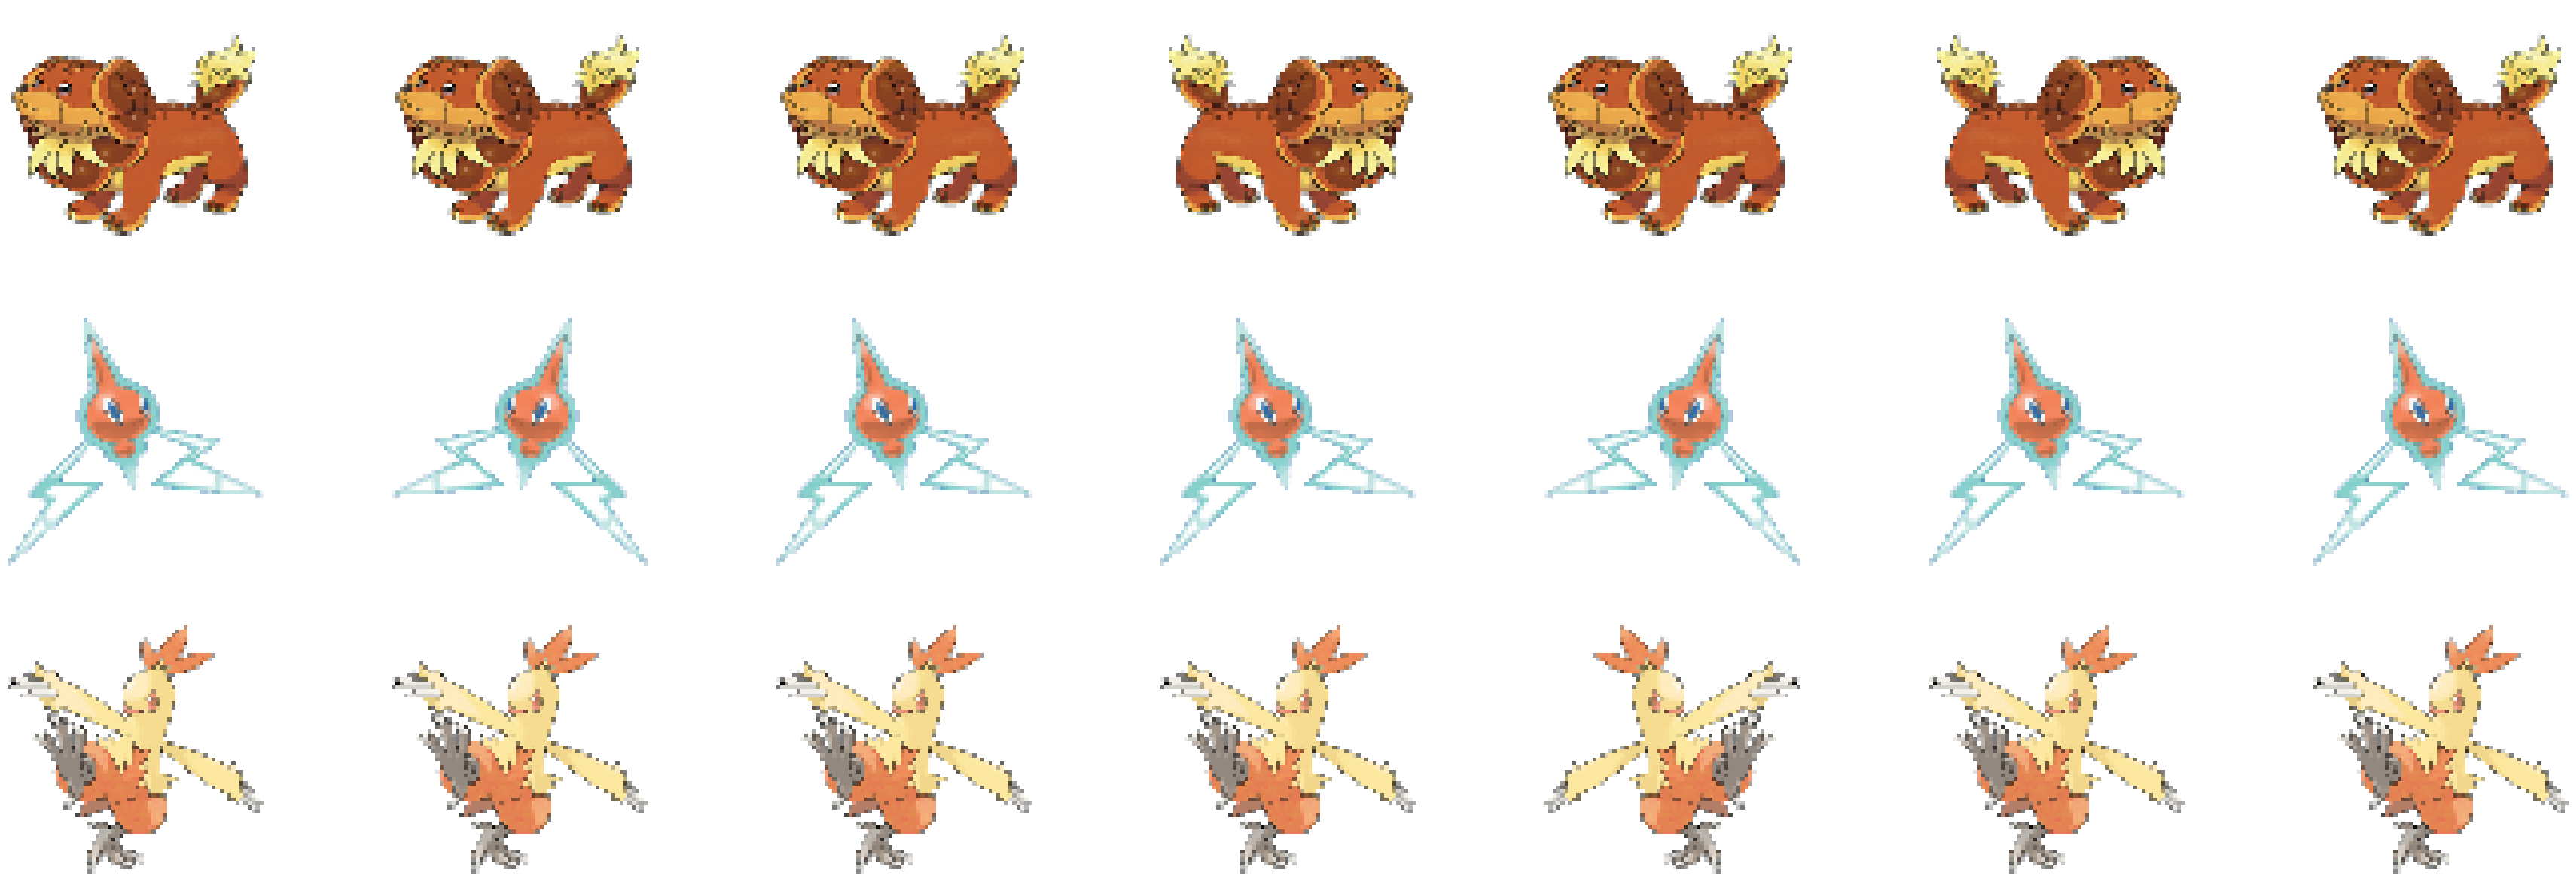

In [10]:
# Visualize the data

# Show seven versions of the first three Pokemons. 
images_per_row = 7
fig, axes = plt.subplots(3, images_per_row, figsize=(45, 15))

# Plotting each image in a subplot
for i, ax in enumerate(axes.flat):
    # The leftmost Pokemon is without augmentation (with_random_augmentation is False).
    with_random_augmentation = False if i % images_per_row == 0 else True
    # print(i//images_per_row)
    # print(with_random_augmentation)
    ax.imshow(dataset.get_pil_image(i//images_per_row, with_random_augmentation=with_random_augmentation))
    ax.axis('off')

plt.savefig(os.path.join(save_img_dir,'dataset_summary.png'), bbox_inches='tight')
plt.show()


Next, we visualize the frequency of each RGB value in the image dataset (before augmentation). After the forward process, this should look like three standard normal distributions.

In [11]:
# Create giant tensor with all images.
img_num = len(dataset.img_list)
tensor_with_all_images = torch.zeros((img_num, CHANNELS, IMG_SIZE, IMG_SIZE))
for i, img in enumerate(dataset.img_list):
    tensor_with_all_images[i,:,:,:] = img

# Save the pixel values of all images in 1D tensor for each channel. 
pixels_red = tensor_with_all_images[:,0,:,:].flatten().numpy()
pixels_green = tensor_with_all_images[:,1,:,:].flatten().numpy()
pixels_blue = tensor_with_all_images[:,2,:,:].flatten().numpy()

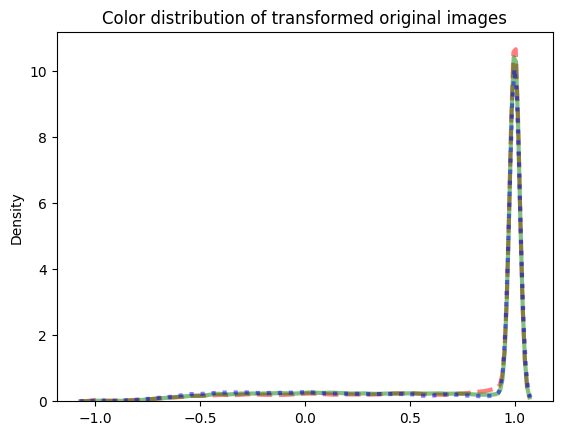

In [12]:
ax = sns.kdeplot(pixels_red, color="red", alpha=0.5, ls="--", lw=3)
sns.kdeplot(pixels_green, color="green", ax=ax, alpha=0.5, lw=3)
sns.kdeplot(pixels_blue, color="blue", ax=ax, alpha=0.5, ls=":", lw=3)
plt.title("Color distribution of transformed original images")
plt.savefig(os.path.join(save_img_dir,'color_distribution_original_images.png'), dpi=300, bbox_inches='tight')

###### 12. Visualizing the Forward Process

12.1 Various schedulers

We defined the various variance schedulers for carrying out the perturbation process.

In [13]:
# Various schedulers

def linear_beta_schedule(beta_start, beta_end, timesteps):
    return torch.linspace(beta_start, beta_end, timesteps)

def quadratic_beta_schedule(beta_start, beta_end,timesteps):
    return torch.linspace(beta_start**0.5, beta_end**0.5, timesteps) ** 2

def sigmoid_beta_schedule(beta_start, beta_end, timesteps):
    betas = torch.linspace(-6, 6, timesteps)
    return torch.sigmoid(betas) * (beta_end - beta_start) + beta_start

def scheduler_type(beta_start, beta_end, timesteps,type_sc='linear'):
    if type_sc == "linear":
        return linear_beta_schedule(beta_start, beta_end, timesteps)
    elif type_sc == "quadratic":
        return quadratic_beta_schedule(beta_start, beta_end, timesteps)
    elif type_sc == "sigmoid":
        return sigmoid_beta_schedule(beta_start, beta_end, timesteps)
    else:
        raise ValueError("unknown scheduler type")


12.2 Visualizing the forward Process

Here we carried out the forward diffusion process by first calculating the noise parameters mean and the standard deviation using.
$$
q(x_{1:T}\vert x_{0})
:= \prod_{t=1}^{T}q(x_{t}\vert x_{t-1})
:=\prod_{t=1}^{T}\mathcal{N}(x_{t};\sqrt{1-\beta_{t}} x_{t-1},\ \beta_{t}\bf I) \tag{1}
$$
Where, $q(x_{0:T})$ is known as the **forward distribution** and $q(x_{t}\vert x_{t-1}$ is referred as **forward diffusion kernel**. This needs to simulate the Markov chain to the time step for which we want to sample.

But we used the reparameterised trick where, given the original image, we can now sample at any arbitrary timestep without simulating the entire Markov chain till that step like the above equaion. So we followed:
$$
q(x_{t}\vert x_{0}) = \mathcal{N}(x_{t};\sqrt{\bar{\alpha_{t}}} x_{0},\ (1 - \bar{\alpha_{t}}) \ \bf{I}) \tag {2}
$$

<Figure size 640x480 with 0 Axes>

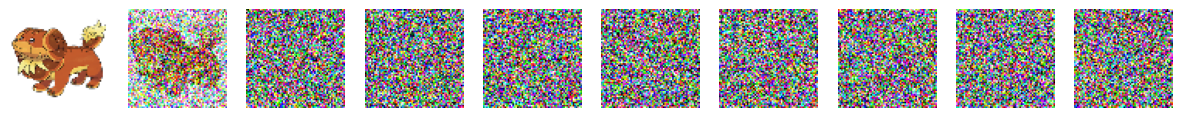

In [14]:
def extract_single(a, t, x_shape):
    t = torch.tensor(t)
    batch_size = t.shape
    out = a.gather(-1, t)
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(DEVICE)

def one_step_forward(img, t):
    
    beta_start = BETA_START
    beta_end = BETA_END
    # beta = torch.linspace(beta_start, beta_end, steps = TIMESTEPS,dtype = torch.float)
    beta = scheduler_type(beta_start, beta_end, TIMESTEPS,type_sc = NOISE_SCHEDULER_TYPE)
    # Using alpha and alpha bar after reparametrization
    alpha = 1.0 - beta
    alpha_bar = torch.cumprod(alpha, axis=0)
    sqrt_alphas_bar = torch.sqrt(alpha_bar)
    sqrt_one_minus_alphas_bar = torch.sqrt(1. - alpha_bar)
 
    # 2. Calculate mean and variance
    sigma = extract_single(sqrt_one_minus_alphas_bar, t, img.shape)
    mu = extract_single(sqrt_alphas_bar, t, img.shape)  
    return img.to(DEVICE) * mu.to(DEVICE)  + sigma.to(DEVICE) * torch.randn_like(img, device=DEVICE)

def create_forward_animation(dataset):
    img = dataset.img_list[0].to(DEVICE)
    img_list = list()
    # if TIMESTEPS is too large, you can use a subset
    img_list.append(tensor_to_img(img))

    for t in range(TIMESTEPS):
        img = one_step_forward(img, t=t)
        img_list.append(tensor_to_img(img)) 
    return img_list
  
img_list = create_forward_animation(dataset)

# the .gif file can get pretty large
imageio.mimsave(os.path.join(save_img_dir,"forward_animate.gif"), img_list, fps=10) 
# we can also show the images inline
show_from_image_list(img_list, filename = os.path.join(save_img_dir,'forward_grid.png'))


The forward process animation:

<table>
  <tr>
    <td>Forward Animated Result:    x_0 --> x_T </td>
  </tr>
  <td><img src=https://drive.google.com/uc?id=1FJQ3xMUxXlHkV9G3fTd2lVOCbjDJePen width=300 height=300></td>

  </tr>
 </table>


We verified forward process ends in a standard normal distribution with the visualization of color distribution of the final timestep image.


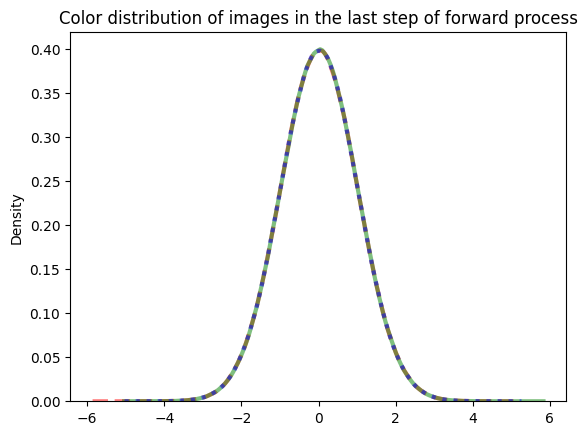

In [15]:
forward_img_list = list()
for n,img in enumerate(dataset.img_list):

    img1 = one_step_forward(img.to(DEVICE), t=TIMESTEPS-1)
    forward_img_list.append(img1)

# Create giant tensor with all images.
img_num = len(forward_img_list)
tensor_with_all_images = torch.zeros((img_num, CHANNELS, IMG_SIZE, IMG_SIZE))
for i, img in enumerate(forward_img_list):
    tensor_with_all_images[i,:,:,:] = img

# Save the pixel values of all images in 1D tensor for each channel. 
pixels_red_f = tensor_with_all_images[:,0,:,:].flatten().numpy()
pixels_green_f = tensor_with_all_images[:,1,:,:].flatten().numpy()
pixels_blue_f = tensor_with_all_images[:,2,:,:].flatten().numpy()

ax = sns.kdeplot(pixels_red_f, color="red", alpha=0.5, ls="--", lw=3)
sns.kdeplot(pixels_green_f, color="green", ax=ax, alpha=0.5, lw=3)
sns.kdeplot(pixels_blue_f, color="blue", ax=ax, alpha=0.5, ls=":", lw=3)
plt.title("Color distribution of images in the last step of forward process")
plt.savefig(os.path.join(save_img_dir,'color_distribution_noisy_images.png'), dpi=100, bbox_inches='tight')

<!-- <table>
  <tr>
    <td>Color Distribution of the last image of our Forward Process:  x_T </td>
  </tr>
  <td><img src=https://drive.google.com/uc?id=1yaPqrbZ5nssjHbKzo-iTy3CJEvd9Tbps width=300 height=300></td>

  </tr>
 </table> -->
 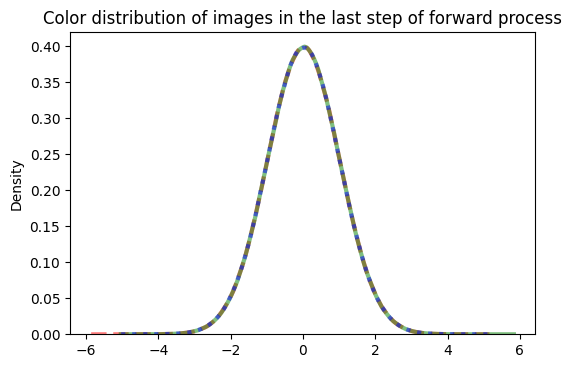

###### 13. Model

13.1 Positional Encoding for the time steps

In [32]:
# ### Positional Encoding
# Position encoding for the time input. 
# Shamefully stolen from https://github.com/tanelp/tiny-diffusion/blob/master/positional_embeddings.py


class SinusoidalEmbedding(nn.Module):
    def __init__(self, size: int, scale: float = 1.0):
        super().__init__()
        self.size = size
        self.scale = scale

    def forward(self, x: torch.Tensor):
        device = x.device
        x = x * self.scale
        half_size = self.size // 2
        emb = torch.log(torch.Tensor([10000.0])) / (half_size - 1)
        emb = torch.exp(-emb.to(device) * torch.arange(half_size,device=device))
        emb = x.unsqueeze(-1) * emb.unsqueeze(0)
        emb = torch.cat((torch.sin(emb), torch.cos(emb)), dim=-1)
        return emb

    def __len__(self):
        return self.size


class LinearEmbedding(nn.Module):
    def __init__(self, size: int, scale: float = 1.0):
        super().__init__()
        self.size = size
        self.scale = scale

    def forward(self, x: torch.Tensor):
        x = x / self.size * self.scale
        return x.unsqueeze(-1)

    def __len__(self):
        return 1

class PositionalEmbedding(nn.Module):
    def __init__(self, size: int, type: str, **kwargs):
        super().__init__()

        if type == "sinusoidal":
            self.layer = SinusoidalEmbedding(size, **kwargs)
        elif type == "linear":
            self.layer = LinearEmbedding(size, **kwargs)
        else:
            raise ValueError(f"Unknown positional embedding type: {type}")

    def forward(self, x: torch.Tensor):
        return self.layer(x)

13.2 Layer Normalization type

In [33]:
# ### Layer Normalization type
# Selet type of normalization. In paper they have used group normalization in convolutional and attention layers


def norm_type(norm, num_channels, num_groups):
    if norm == "in":
        return nn.InstanceNorm2d(num_channels, affine=True)
    elif norm == "bn":
        return nn.BatchNorm2d(num_channels)
    elif norm == "gn":
        return nn.GroupNorm(num_groups, num_channels)
    elif norm is None:
        return nn.Identity()
    else:
        raise ValueError("unknown normalization type")


13.3 Self-Attention network

In [34]:
# Self Attention is used as per DDPM paper, with various normalization
class AttentionBlock(nn.Module):
    """Applies QKV self-attention with a residual connection.
    
    Input:
        x: tensor of shape (N, in_channels, H, W)
        norm (string or None): which normalization to use (instance, group, batch, or none). Default: "gn"
        num_groups (int): number of groups used in group normalization. Default: 32
    Output:
        tensor of shape (N, in_channels, H, W)
    Args:
        in_channels (int): number of input channels
    """
    def __init__(self, in_channels, norm="gn", num_groups=32):
        super().__init__()
        
        self.in_channels = in_channels
        self.norm = norm_type(norm, in_channels, num_groups)
        self.to_qkv = nn.Conv2d(in_channels, in_channels * 3, 1)
        self.to_out = nn.Conv2d(in_channels, in_channels, 1)

    def forward(self, x):
        b, c, h, w = x.shape
        q, k, v = torch.split(self.to_qkv(self.norm(x)), self.in_channels, dim=1)

        q = q.permute(0, 2, 3, 1).view(b, h * w, c)
        k = k.view(b, c, h * w)
        v = v.permute(0, 2, 3, 1).view(b, h * w, c)

        dot_products = torch.bmm(q, k) * (c ** (-0.5))
        assert dot_products.shape == (b, h * w, h * w)

        attention = torch.softmax(dot_products, dim=-1)
        out = torch.bmm(attention, v)
        assert out.shape == (b, h * w, c)
        out = out.view(b, h, w, c).permute(0, 3, 1, 2)

        return self.to_out(out) + x


13.4 Up and Downsample modules of our U-Net

In [35]:
class Downsample(nn.Module):
    """Downsamples a given tensor by a factor of 2. Uses strided convolution. Assumes even height and width.
    Input:
        x: tensor of shape (N, in_channels, H, W)
        time_emb: ignored
        y: ignored
    Output:
        tensor of shape (N, in_channels, H // 2, W // 2)
    Args:
        in_channels (int): number of input channels
    """

    def __init__(self, in_channels):
        super().__init__()

        self.downsample = nn.Conv2d(in_channels, in_channels, 3, stride=2, padding=1)
    
    def forward(self, x, time_emb, y):
        if x.shape[2] % 2 == 1:
            raise ValueError("downsampling tensor height should be even")
        if x.shape[3] % 2 == 1:
            raise ValueError("downsampling tensor width should be even")

        return self.downsample(x)

class Upsample(nn.Module):
    __doc__ = r"""Upsamples a given tensor by a factor of 2. Uses resize convolution to avoid checkerboard artifacts.
    Input:
        x: tensor of shape (N, in_channels, H, W)
        time_emb: ignored
        y: ignored
    Output:
        tensor of shape (N, in_channels, H * 2, W * 2)
    Args:
        in_channels (int): number of input channels
    """

    def __init__(self, in_channels):
        super().__init__()

        self.upsample = nn.Sequential(
            nn.Upsample(scale_factor=2, mode="nearest"),
            nn.Conv2d(in_channels, in_channels, 3, padding=1),
        )
    
    def forward(self, x, time_emb, y):
        return self.upsample(x)


13.5 Class conditional Encodings:\
This encodes the class information for using with the activation layers.

In [36]:
class ConditionalEmbedding(nn.Module):
    def __init__(self, input_dim:int, emb_dim:int):
        super().__init__()
        self.condEmbedding = nn.Sequential(
            nn.Linear(input_dim, emb_dim),
            nn.SiLU(),
            nn.Linear(emb_dim, emb_dim),
        )

    def forward(self, t:torch.Tensor) -> torch.Tensor:
        emb = self.condEmbedding(t)
        return emb


13.6 Residual Block

The introduction of encoded class information into the layers activation is carried out here in this block

In [37]:
class ResidualBlock(nn.Module):
    """Applies two conv blocks with resudual connection. Adds time and class conditioning by adding bias after first convolution.
    Input:
        x: tensor of shape (N, in_channels, H, W)
        time_emb: time embedding tensor of shape (N, time_emb_dim) or None if the block doesn't use time conditioning
        y: classes tensor of shape (N) or None if the block doesn't use class conditioning
    Output:
        tensor of shape (N, out_channels, H, W)
    Args:
        in_channels (int): number of input channels
        out_channels (int): number of output channels
        time_emb_dim (int or None): time embedding dimension or None if the block doesn't use time conditioning. Default: None
        num_classes (int or None): number of classes or None if the block doesn't use class conditioning. Default: None
        activation (function): activation function. Default: torch.nn.functional.relu
        norm (string or None): which normalization to use (instance, group, batch, or none). Default: "gn"
        num_groups (int): number of groups used in group normalization. Default: 32
        use_attention (bool): if True applies AttentionBlock to the output. Default: False
    """

    def __init__(
        self,
        in_channels,
        out_channels,
        dropout,
        time_emb_dim=None,
        num_classes=None,
        activation=F.relu,
        norm="gn",
        num_groups=32,
        use_attention=False,
    ):
        super().__init__()

        self.activation = activation

        self.norm_1 = norm_type(norm, in_channels, num_groups)
        self.conv_1 = nn.Conv2d(in_channels, out_channels, 3, padding=1)

        self.norm_2 = norm_type(norm, out_channels, num_groups)
        self.conv_2 = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
        )

        self.time_bias = nn.Linear(time_emb_dim, out_channels) if time_emb_dim is not None else None
        self.class_bias = ConditionalEmbedding(num_classes, out_channels) if num_classes is not None else None

        self.residual_connection = nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.attention = nn.Identity() if not use_attention else AttentionBlock(out_channels, norm, num_groups)
    
    def forward(self, x, time_emb=None, y=None):
        out = self.activation(self.norm_1(x))
        out = self.conv_1(out)

        if self.class_bias is not None:

            out *= self.class_bias(y)[:, :, None, None]

        if self.time_bias is not None:
            if time_emb is None:
                raise ValueError("time conditioning was specified but time_emb is not passed")
            out += self.time_bias(self.activation(time_emb))[:, :, None, None]

        out = self.activation(self.norm_2(out))
        out = self.conv_2(out) + self.residual_connection(x)
        out = self.attention(out)

        return out


13.7 Conditional U-Net

In [38]:
class Network_UNet(nn.Module):
    
    """ 
    Input:
            x:tensor of shape (N, in_channels, H, W)
            time_emb: time embedding tensor of shape (N, t_dim) 
            y: class tensor of shape (N) for applying class conditioning. This is where we will condition with classes of the various categories
    
    Args:
        img_channels (int): number of image channels
        base_channels (int): number of base channels (after first convolution)
        channel_mults (tuple): tuple of channel multiplers. Default: (1, 2, 4, 8)
        t_dim (int or None): time embedding dimension or None if the block doesn't use time conditioning. Default: None
        time_emb_scale (float): linear scale to be applied to timesteps. Default: 1.0
        num_classes (int or None): number of classes or None if the block doesn't use class conditioning. Default: None
        activation (function): activation function. Default: torch.nn.functional.relu
        dropout (float): dropout rate at the end of each residual block
        attention_resolutions (tuple): list of relative resolutions at which to apply attention. Default: ()
        norm (string or None): which normalization to use (instance, group, batch, or none). Default: "gn"
        num_groups (int): number of groups used in group normalization. Default: 32
        initial_pad (int): initial padding applied to image. Should be used if height or width is not a power of 2. Default: 0
    """
    def __init__(self, img_channels = 3, 
                    base_channels = 64,
                    t_dim= 128,
                    time_emb_type= "sinusoidal", 
                    chn_mult = (1,2,4,8),
                    activation_fn=F.relu,
                    norm = 'gn',
                    num_groups = 32,
                    attention_resolutions=(),
                    num_classes = None,
                    num_res_blocks=2,
                    dropout = 0.1
                    ):
        super().__init__()


        self.time_embed_mlp = nn.Sequential( 
            PositionalEmbedding(t_dim, time_emb_type),
            nn.Linear(t_dim,t_dim),
            nn.ReLU()
            ) if t_dim is not None else None
        
        self.num_classes = num_classes

        self.first_conv = nn.Conv2d(img_channels,base_channels,3, padding=1)

        self.activation = activation_fn
        # Down Sample
        self.down_blocks = nn.ModuleList()
        # Updample
        self.up_blocks = nn.ModuleList()



        chns = [base_channels]
        now_chns = base_channels
        
        for i,mult in enumerate(chn_mult):
            out_chns = mult * base_channels
            for _ in range(num_res_blocks):

                self.down_blocks.append(ResidualBlock(
                        now_chns,
                        out_chns,
                        dropout,
                        time_emb_dim=t_dim,
                        num_classes=num_classes,
                        activation=activation_fn,
                        norm=norm,
                        num_groups=num_groups,
                        use_attention=i in attention_resolutions,
                ))
                now_chns = out_chns
                chns.append(now_chns)
            if i != len(chn_mult) - 1:
                self.down_blocks.append(Downsample(now_chns))
                chns.append(now_chns)

        self.mid_blocks = nn.ModuleList([
            ResidualBlock(now_chns, now_chns, dropout, time_emb_dim=t_dim, num_classes = num_classes,
                            activation = activation_fn, norm=norm, num_groups = num_groups, use_attention = True),
            ResidualBlock(now_chns, now_chns, dropout, time_emb_dim=t_dim, num_classes = num_classes,
                            activation = activation_fn, norm=norm, num_groups = num_groups, use_attention = False)
        ]) 
        for i,mult in reversed((list(enumerate(chn_mult)))):
            out_chns = base_channels * mult

            for _ in range(num_res_blocks + 1):
                self.up_blocks.append(ResidualBlock(
                    chns.pop() + now_chns,
                    out_chns,
                    dropout,
                    time_emb_dim=t_dim,
                    num_classes=num_classes,
                    activation=activation_fn,
                    norm=norm,
                    num_groups = num_groups,
                    use_attention = i in attention_resolutions
                ))
                now_chns = out_chns
            if i != 0:
                self.up_blocks.append(Upsample(now_chns))
        assert len(chns) == 0

        self.out_norm = norm_type(norm,base_channels,num_groups)
        self.tail_conv = nn.Conv2d(base_channels, img_channels,3,padding=1)

    def forward(self, x, t=None, y=None,cls_mask=None):
        
        if self.time_embed_mlp is not None:
            if t is None:
                raise ValueError("time conditioning is not none but time is not passed")
            
            t_emb = self.time_embed_mlp(t)
        else:
            t_emb = None
        
        if self.num_classes is not None and y is None:
            raise ValueError("class conditioning was specified but y is not passed")
        

        x = self.first_conv(x)
        h_skips = [x]  # the skip connection s that bypass the features from down_blocks to up_blocks
        
        # This is for classifier free guidance
        if self.num_classes is not None:
            # convert label to one hot embedding
            y = nn.functional.one_hot(y, num_classes=self.num_classes).type(torch.float)

            # mask out context if cls_mask == 1
            cls_mask = cls_mask[:, None]
            cls_mask = cls_mask.repeat(1,self.num_classes)
            cls_mask = (-1*(1-cls_mask)) # need to flip 0 <-> 1
            y = y * cls_mask
        else:
            y = None

        for layer in self.down_blocks:
            x = layer(x,t_emb,y)
            h_skips.append(x)

        for layer in self.mid_blocks:
            x = layer(x,t_emb,y)

        for layer in self.up_blocks:
            if isinstance(layer, ResidualBlock):
                x = torch.cat([x, h_skips.pop()], dim=1)
            x = layer(x, t_emb, y)            
        
        x = self.activation(self.out_norm(x))
        x = self.tail_conv(x)

        assert len(h_skips) == 0
        return x



###### 14.  Diffusion Process

The sampling algorithm of the classifier free guidance has been implemented here in the *previous_sample* attribute of the below class. Also, the mask is defined in the *forward_process* and *run_sample* attributes for carrying out both conditional and unconditional model prediction.

In [39]:
class DiffusionProcess(nn.Module):
    def __init__(self, model, T,beta_start=0.0001,beta_end=0.05, sch_type = 'linear',p_uncond=0.1):
        super().__init__()
        
        self.T_steps = T
        
        self.betas = scheduler_type(beta_start, beta_end, self.T_steps,type_sc=sch_type)

        # Using alpha and alpha bar after reparametrization
        # Remeber to check the size of alphas and alpha_bar and alpha_bar_prev
        self.alphas = 1.0 - self.betas
        self.alphas_bar = torch.cumprod(self.alphas, axis=0)
        self.alphas_bar_prev = F.pad(self.alphas_bar[:-1], (1, 0), value=1.0)

        self.sqrt_recip_alphas = torch.sqrt(1.0 / self.alphas)

        # calculations for forward diffusion q(x_t | x_{t-1}) and others
        self.sqrt_alphas_bar = torch.sqrt(self.alphas_bar)
        self.sqrt_one_minus_alphas_bar = torch.sqrt(1. - self.alphas_bar)

        # calculations for reverse process posterior q(x_{t-1} | x_t, x_0) (eqn - 7)
        self.posterior_variance = self.betas * (1.- self.alphas_bar_prev) / (1. - self.alphas_bar)    
        self.p_uncond = p_uncond

    # Importantly, extract function will allow us to extract the appropriate t index for a batch of indices.
    def extract(self,a, t, x_shape):
        batch_size = t.shape[0]
        out = a.gather(-1, t.cpu())
        return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)
    
    def forward_process(self,img, t, c, noise= None):
        # Forward Diffusion
        # Make the alpha same dimension as that of the image
        if noise is None:
            noise = torch.randn_like(img, device=DEVICE)

        sqrt_alphas_bar_t = self.extract(self.sqrt_alphas_bar, t, img.shape)  # mu
        sqrt_one_minus_alphas_bar_t = self.extract(self.sqrt_one_minus_alphas_bar, t, img.shape)   # sigma 
        

        context_mask = torch.bernoulli(torch.zeros_like(c)+self.p_uncond).to(DEVICE)

        return img * sqrt_alphas_bar_t  + sqrt_one_minus_alphas_bar_t * noise, context_mask
        
    
    @torch.no_grad()
    def previous_sample(self,model,x,t,t_index,y,c_mask,guide_factor):
        betas_t = self.extract(self.betas,t,x.shape)
        sqrt_one_minus_alphas_bar_t = self.extract(self.sqrt_one_minus_alphas_bar, t, x.shape)
        sqrt_one_minus_alphas_t = self.extract(self.sqrt_recip_alphas,t, x.shape)
        if CLASS_COND is not None:
            bt_sz = x.shape[0]

            # double batch
            x = x.repeat(2,1,1,1)
            t = t.repeat(2)

            eps = model(x, t/self.T_steps, y,c_mask)

            eps1 = eps[:bt_sz]
            eps2 = eps[bt_sz:]

            eps = (1+guide_factor)*eps1 - guide_factor*eps2
            x = x[:bt_sz]
            t = t[:bt_sz]
        else:
            eps = model(x, t/self.T_steps, y=None,c_mask=None)

        mean_mu_theta = sqrt_one_minus_alphas_t * (x - betas_t * eps / sqrt_one_minus_alphas_bar_t)
        if t_index == 0:
            return mean_mu_theta
        else:
            posterior_variance_t = self.extract(self.posterior_variance, t, x.shape) # sigma_t^2 in line 4 of algorithm 2
            noise = torch.randn_like(x)

            return mean_mu_theta + torch.sqrt(posterior_variance_t) * noise

    @torch.no_grad()
    def run_sample(self,model, image_size, batch_size=16, channels=3, device=None, class_num=None,guide_factor=None,low_limit=0):

        shape = (batch_size, channels, image_size, image_size)

        batch_size = shape[0]

        img = torch.randn(shape,device=device)            
        imgs = [] # for storing the reconstructed imgs over the timesteps
        if CLASS_COND is not None:
            c_i = torch.arange(low_limit, class_num) # torch.tensor(class_num)  
            c_i = c_i.repeat(int(batch_size/c_i.shape[0])).to(device).squeeze()

            context_mask = torch.zeros_like(c_i).to(device)

            c_i = c_i.repeat(2)
            context_mask = context_mask.repeat(2)

            context_mask[batch_size:] = 1.
        else:
            c_i, context_mask = None, None

        for i in tqdm(reversed(range(0, self.T_steps)), desc='sampling loop time step', total=self.T_steps):
            img = self.previous_sample(model, img, torch.full((batch_size,), i, device=device, dtype=torch.long), i , c_i,context_mask,guide_factor)
            if i%TIME_DIV==0:
                imgs.append(img.cpu())
        return imgs



###### 15. Model , Optimizer and Diffusion Process initialization

In [40]:
if CLASS_COND is not None:
    no_classes = len(dataset.classes)  # yes using
else:
    no_classes = None    # not using

# Initialize model correctly
model = Network_UNet(
    img_channels = CHANNELS,
    base_channels = 64,
    t_dim= TIME_DIMENSION,
    time_emb_type= TIME_EMBEDDING_TYPE, 
    chn_mult = (1,2,4,8),
    activation_fn=F.relu,
    norm = 'gn',
    num_groups = NUM_GROUPS,
    num_classes = no_classes,
    num_res_blocks=2,
    dropout = 0.1
)
model.to(DEVICE)

optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

# Initialize the diffusion process. This includes the forward and the reverse process
diff_prs = DiffusionProcess(model, TIMESTEPS,beta_start=BETA_START,beta_end=BETA_END, sch_type = NOISE_SCHEDULER_TYPE,p_uncond=0.1)



###### 16. Loss functions used in Diffusion

In [41]:
# Here you can add different losses used in various diffusion literature. We have used only mse loss 

def diffusion_losses(denoise_model, x_start, t, y=None, noise=None, loss_type="l1"):
    if noise is None:
        noise = torch.randn_like(x_start)

    x_noisy,c_mask = diff_prs.forward_process(x_start, t, y, noise=noise)
    predicted_noise = denoise_model(x_noisy, t/TIMESTEPS, y, cls_mask=c_mask)
    
    if loss_type == 'l2':
        loss = F.mse_loss(noise, predicted_noise) # check the gerrits way
    else:
        raise NotImplementedError()

    return loss

###### 17. Training Loop 

In [ ]:
# We are training for 2000 epochs and after every 10 epochs we are saving the model predictions and the FID (Frechet Inception Distance) score
if TRAIN:

    last_best_loss = 100  # for saving the best weights
    fid = FID(feature=192) # # for computing the FID score
    for epoch in range(EPOCHS):
        running_loss = 0.0
        model.train()
        for step, batch in enumerate(dataloader):
            optimizer.zero_grad()
            
            imgs_bt_, lbl_bt_ = batch
            imgs_bt, lbl_bt = imgs_bt_.to(DEVICE), lbl_bt_.long().to(DEVICE)

            t = torch.randint(0, TIMESTEPS, (imgs_bt.shape[0],), device=DEVICE).long()

            loss = diffusion_losses(model, imgs_bt, t, loss_type=LOSS_TYPE,y = lbl_bt)

            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        tr_loss = running_loss/len(dataloader)
        
        # save intermediate generated images after every 10 epoch 
        # for checking the performance of the model
        if epoch%10==0:
            
            model.eval()
            
            num_samples = 3*no_classes if CLASS_COND is not None else imgs_bt.shape[0]

            # Select a random pokemon type class
            # lbl_cnd = random.randint(0, no_classes) if CLASS_COND is not None else None
            
            samples = diff_prs.run_sample(model, image_size=IMG_SIZE, batch_size=num_samples, channels=CHANNELS,class_num=no_classes,guide_factor=0.5,device=DEVICE,low_limit=0)

            all_images = torch.stack(samples,dim=1)
            all_images = all_images.permute(1,0,2,3,4)# made it time_steps x batch x ch x h x w 

            re = imgs_bt.mul(255).add_(0.5).clamp_(0, 255).to("cpu", torch.uint8)
            fa = all_images[-1,:,:,:,:].mul(255).add_(0.5).clamp_(0, 255).to("cpu", torch.uint8)
            fid.update(re, real=True)
            fid.update(fa, real=False)
            print('FID Score: {}'.format(fid.compute()))    
            
            all_images = all_images[:,:5,:,:,:].permute(1,0,2,3,4).contiguous().view(-1,CHANNELS,IMG_SIZE,IMG_SIZE) 

            all_images = (all_images + 1) * 0.5
            save_image(all_images, str(results_folder / f'sample-{epoch}.png'), nrow = 10)

        print("Epoch:{} | Loss:{}".format(epoch,tr_loss))
        if tr_loss<=last_best_loss:
            print("Saving model...")
            torch.save(model.state_dict(), f"{outdir}/model_{experiment_name}.pth")
            last_best_loss=tr_loss

###### 6. Generation of Pokemons

Show the pokemon type

In [28]:
if CLASS_COND is not None:
    pokemon_type = {}
    for n,cls in enumerate(dataset.classes):
        pokemon_type['{}'.format(cls)]=n
    print(pokemon_type)

{'Bug': 0, 'Dark': 1, 'Dragon': 2, 'Electric': 3, 'Fairy': 4, 'Fighting': 5, 'Fire': 6, 'Flying': 7, 'Ghost': 8, 'Grass': 9, 'Ground': 10, 'Ice': 11, 'Normal': 12, 'Poison': 13, 'Psychic': 14, 'Rock': 15, 'Steel': 16, 'Water': 17, 'mega': 18}


Run the sample Generation

Change the parameters for various class generation\
*low_limit* = between 0 to 18 (total classes) \
*no_classes* = between 0 to 18 (but should be greater than low_limit) \
*num_samples* = integer (but num_samples % (no_classes-low_limit)=0)


In [ ]:
# sample images
print('Inferencing checking')

fid = FID(feature=192) # # for computing the FID score
saved_weights = torch.load(os.path.join(outdir,'model_{}.pth'.format(experiment_name)), map_location=torch.device('cuda'))

no_classes = len(dataset.classes)


model.load_state_dict(saved_weights) 
model.eval()
img_ten = next(iter(dataloader))[0].to(DEVICE)
low_limit = 10  
no_classes = 18
num_samples = 64 if CLASS_COND is not None else img_ten.shape[0]

nrow = int(num_samples/(no_classes-low_limit))

# remember : num_samples % (no_classes-low_limit)=0 .
samples = diff_prs.run_sample(model, image_size=IMG_SIZE, batch_size=num_samples, channels=CHANNELS,class_num=no_classes,guide_factor=gf,device=DEVICE,low_limit=low_limit)

all_pred_images = torch.stack(samples,dim=1)
all_pred_images = all_pred_images.permute(1,0,2,3,4) # made it time_steps x batch x ch x h x w 

re = img_ten.mul(255).add_(0.5).clamp_(0, 255).to("cpu", torch.uint8)
fa = all_pred_images[-1,:,:,:,:].mul(255).add_(0.5).clamp_(0, 255).to("cpu", torch.uint8)
fid.update(re, real=True)
fid.update(fa, real=False)
print('FID Score: {}'.format(fid.compute()))   

all_test = []
for i in range(all_pred_images.shape[0]):
    all_pred =  torchvision.utils.make_grid(all_pred_images[i],nrow=nrow).mul(255).add_(0.5).clamp_(0, 255).permute(1, 2, 0).to("cpu", torch.uint8).numpy()
    all_test.append(all_pred)
imageio.mimsave(os.path.join(save_img_dir,"backward_animate_{}_gf_{}.gif".format(experiment_name,gf)), all_test, fps=5)

print("Saving Final image...")

imageio.imwrite(os.path.join(save_img_dir,"pred_image_{}_gf_{}.png".format(experiment_name,gf)), all_test[-1])